<br><br>

<div style='text-align: center;'> <h2>Recurrent Neural Network-Based Recommender System</h2>

</div>
<br> 

&emsp;&emsp;&emsp;&emsp;**This project employs deep neural networks, particularly a recurrent neural network, to develop a comprehensive book recommendation system that can deliver personalized book recommendations. A recommendation system identifies the preferences of a given user and offers relevant suggestions or related content in return. For this recommendation system, the recommender would take input from the user with the name of a given book or a query and deliver highly tailored book recommendations in return. It leverages both content-based and genre-based similarities in providing the final recommendations. Having been trained on a large dataset (taken from Goodreads books database) comprised of thousands of different books, authors, genres, reviews, plot summaries and descriptions, it identifies similarities between the input book (given by the user) and other books in the database across all these different dimensions, selects and returns the most similar or most relevant ones. This book recommendation system can also filter, preprocess, and parse text to enable better matching and comparison. It also ensures author variety and can also be easily customized to increase or decrease the number of relevant recommendations or to control the degree to which the recommendations should be content-based or genre-based. All this ultimately culminates into a powerful book recommender system that can be used to search for and explore new books based on one's prior preferences and book favorites.**

<br>

&emsp;&emsp;&emsp;&emsp;**The dataset presented here was taken from Kaggle, which you can access easily by clicking [here](https://www.kaggle.com/datasets/dk123891/books-dataset-goodreadsmay-2024). This dataset consists of thousands of books collected from Goodreads, a popular platform for discovering, reviewing, and discussing books. Indeed, it provides a comprehensive book collection of more than 16,000 books in total, covering a myriad of different authors, genres, and literary eras, ancient and modern. It covers all the major literary works from the ancient times and up to May 2024. Each book featured, represented by a data row, covers important details and descriptions about it, including the book title, author, genre classification, publication date, format, and its average rating score. As such, the data here can support a variety of purposes, from data analysis to studying user-preferences and performing sentiment analysis to building recommendation systems, as with the current case. This dataset has been licensed by MIT for free use for commercial and non-commercial purposes.** <br> 
<br>

**You can view each column and its description in the table below:** <br><br>  

| **Variable**      | **Description**                                                                                         |
| :-----------------| :------------------------------------------------------------------------------------------------------ |
| **book_id**       | Unique identifier for each book in the data                                                             |
| **cover_image_uri**| URI or URL pointing to the cover image of the book                                                     |
| **book_title**    | Title of the book                                                                                       |
| **book_details**  | Details about the book, including summary, plot, synopsis or other descriptive information              |
| **format**        | Details about the format of the book such as whether it's a hardcover, paperback, or audiobook          |
| **publication_info** | Information about the publication of the book including the publisher, publication date, or any other relevant details |
| **authorlink**    |   URI or URL pointing to more information about the author (if available)                               |
| **author**        | Name of the book author(s)                                                                              |
| **num_pages**     | Number of pages                                                                                         |
| **genres**        | Genre labels applying to the book                                                                       |
| **num_ratings**   | Total number of ratings                                                                                 |
| **num_reviews**   | Total number of reviews                                                                                 |
| **average_rating**    | Overall average rating score                                                                        |
| **rating_distribution** | Number of ratings per rating star (for a 5-point rating system)                                   |

<br>
<br>


&emsp;&emsp;&emsp;&emsp;**In order to develop the book recommendation system, the dataset is first inspected, cleaned, filtered and updated in preparation for analysis and model development. After having prepared and analyzed the data thoroughly, different text preprocessing techniques were applied to normalize the text and make it viable for modeling. These include the removal of stop words, lemmatization, tokenization and padding. Further, such normalization was applied across all different languages supported by the relevant libraries, to make sure all languages featured are treated in a similar manner. Subsequently, a deep recurrent neural network was developed and trained for the task. This network incorporated an embedding layer for word embedding, a bidirectional Long-Short Term Memory (LSTM), a self-attention layer and two additional dense layers. The embedding layer sought to capture semantic relationships between books' descriptions, which fed into the LSTM layers to capture context and identify semantic dependencies, feeding then to the attentional layer which added weight to the most relevant descriptors for each respective book, and lastly feeding forward to the last two dense layers to carve out the representation space for the books dataset. The network was trained using triplet loss, a type of loss function whose objective is to differentiate between pairs of items correctly, grouping similar ones together and keeping dissimilar ones apart. This helps the model learn embeddings from a limited number of samples. After training, the network was used to generate the book embeddings for the dataset. These embeddings were then compared using cosine similarity to measure and map out the similarities between the different book embeddings, returning a large data matrix with the overall similarities between books. In addition, a separate data matrix was developed for book genres alone to identify and map out the exact genre similarities between the books (using jaccard distance similarity). With the analysis and modeling coming to completion, a book recommendation function was then developed to utilize the similarity matrices obtained in order to deliver tailored book recommendations. As mentioned, this function also features different options to control the nature of the book recommendations such as whether to recommend by genre in particular or by overall similarity more generally and how many books are to be recommended. The book recommender was then put to test, first testing it with well known books (e.g., Shakespeare's 'Macbeth'), then testing it using different book titles sampled at random from the database, and then lastly testing it using user input, in which the user can pass any book they are looking for similar recommendations to and the recommendation function takes care of the rest. Finally, a derivative recommender function was developed to take user queries, instead of simply book titles, allowing the user to describe the type of book they want or topic they would like to explore, based on which recommendations are then delivered. This function was also tested with different descriptors typical of different genres. You can test the recommender yourself.** <br>

<br>

**Overall, the project is broken down into 7 sections: <br>
&emsp; 1) [Reading and Inspecting the Data](#reading-and-inspecting-the-data) <br>
&emsp; 2) [Cleaning and Updating the Data](#cleaning-and-updating-the-data) <br> 
&emsp; 3) [Exploratory Data Analysis](#exploratory-data-analysis) <br>
&emsp; 4) [Text Preprocessing](#text-preprocessing) <br>
&emsp; 5) [Model Development and Training](#model-development-and-training) <br>
&emsp; 6) [Building a Book Recommendation Function](#building-a-book-recommendation-function) <br>
&emsp; 7) [Testing the Recommendation System](#testing-the-recommendation-system) <br>
&emsp; 8) [Summary](#summary)** <br>

<br>
<br>


**Importing Python Modules**

In [1]:
#Importing the modules for use 
import os 
import re
import math
import requests
import textwrap
import numpy as np
import pandas as pd
from io import BytesIO
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.spatial.distance import squareform, pdist, jaccard
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
import stopwordsiso as stopwords
from langdetect import detect
import stanza
import tensorflow as tf
from tensorflow.keras import layers, optimizers  
from tensorflow.keras.preprocessing.text import Tokenizer    
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping 


import warnings
warnings.simplefilter('ignore')   #disable python warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'   #disable tensorflow warnings

#Adjust pandas data display settings 
pd.set_option('display.max_colwidth', 100)
#Set plotting context 
sns.set_context('paper') 
%matplotlib inline

**Random Seed**

In [2]:
#Set random seed for reproducible results
rs = 252

#set global seed for numpy and tensorflow
np.random.seed(rs)
tf.random.set_seed(rs)


**Defining Custom Functions**

In [3]:
#Define function to display books by their covers
def get_covers(books_df: pd.DataFrame):
    n_books = len(books_df.index)
    n_cols = ((n_books + 1) // 2) if n_books > 5 else n_books
    n_rows = math.ceil(n_books / n_cols)
    
    #create figure and specify subplot characeristics
    plt.figure(figsize=(4.2*n_cols, 6.4*n_rows), facecolor='whitesmoke')
    plt.subplots_adjust(bottom=.1, top=.9, left=.02, right=.88, hspace=.32)  
    plt.rcParams.update({'font.family': 'Palatino Linotype'})   #adjust font type

    #request, access and plot each book cover 
    for i in range(n_books):
        try:
            response = requests.get(books_df['cover_image_uri'].iloc[i])
        except:
            print('\nCouldn\'t retrieve book cover. Check your internet connection and try again...\n\n', flush=True)
            return
        
        #access and resize image
        img = Image.open(BytesIO(response.content))
        img = img.resize((600, 900))
        
        #shorten and wrap book title
        full_title = books_df['book_title'].iloc[i]
        short_title = re.sub(r'[:?!].*', '', full_title)
        title_wrapped = "\n".join(textwrap.wrap(short_title, width=26))
        
        #plot book cover 
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(img)
        plt.title(title_wrapped, fontsize=21, pad=15)
        plt.axis('off')    
    plt.show()


#Define custom function to visualize model training history
def plot_training_history(run_histories: list, metrics: list = [None], title='Model run history'):
    #If no specific metrics are given, infer them from the first history object
    if metrics is None:
        metrics = [key for key in run_histories[0].history.keys() if 'val_' not in key]
    else:
        metrics = [metric.lower() for metric in metrics]

    #Set up the number of rows and columns for the subplots
    n_metrics = len(metrics)
    n_cols = min(3, n_metrics)  #Limit to a max of 3 columns for better readability
    n_rows = math.ceil(n_metrics / n_cols)

    #Set up colors to use
    colors = ['steelblue', 'red', 'skyblue', 'orange', 'indigo', 'green', 'DarkCyan', 'olive', 'brown', 'hotpink']

    #Ensure loss first is plotted first
    if 'loss' in metrics:
        metrics.remove('loss')
        metrics.insert(0,'loss')

    #Initialize the figure and axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7.5*n_cols, 5 * n_rows))
    axes = axes.flatten() if n_metrics > 1 else [axes]

    #Loop over each metric and create separate subplots
    for i, metric in enumerate(metrics):
        #Initialize starting epoch
        epoch_start = 0
        for j, history in enumerate(run_histories):
            epochs_range = range(epoch_start, epoch_start + len(history.epoch))

            #Plot training and validation metrics for each run history
            axes[i].plot(epochs_range, history.history[metric], color=colors[i*2], ls='-', lw=2, label=(f'Training {metric}') if j==0 else None)
            axes[i].set_xticks(epochs_range)
            if f'val_{metric}' in history.history:
                axes[i].plot(epochs_range, history.history.get(f'val_{metric}', []), color=colors[i*2+1], ls='-', lw=2, label=(f'Validation {metric}') if j==0 else None)

            #Update the epoch start for the next run
            epoch_start += len(history.epoch)

        #Set the titles, labels, and legends
        axes[i].set(title=f'{metric.capitalize()} over Epochs', xlabel='Epoch', ylabel=metric.capitalize())
        axes[i].legend(loc='best')

    #Remove any extra subplots if the grid is larger than the number of metrics
    for k in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[k])

    fig.suptitle(title, fontsize=16, y=(0.95) if n_rows>1 else 0.98)
    #plt.tight_layout(pad=1.1)  # (left, bottom, right, up)
    plt.show()



<a id="reading-and-inspecting-the-data"></a> 
## Part One: Reading and Inspecting the Data


**Loading and reading the dataset**

In [4]:
#Access and read data into dataframe
df = pd.read_csv('Book_Details.csv', index_col='Unnamed: 0')

#drop unnecessary columns 
df = df.drop(['book_id', 'format', 'authorlink', 'num_pages'], axis=1)


**Inspecting the data**

In [5]:
#report the shape of the dataframe
shape = df.shape
print('Number of coloumns:', shape[1])
print('Number of rows:', shape[0])


Number of coloumns: 10
Number of rows: 16225


In [6]:
#Preview first 5 entries
df.head()

cover_image_uri  \
0  https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1587697303...   
1  https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1546910265...   
2  https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1474154022...   
3  https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1630547330...   
4  https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1554006152...   

                                  book_title  \
0     Harry Potter and the Half-Blood Prince   
1  Harry Potter and the Order of the Phoenix   
2      Harry Potter and the Sorcerer's Stone   
3   Harry Potter and the Prisoner of Azkaban   
4        Harry Potter and the Goblet of Fire   

                                                                                          book_details  \
0  It is the middle of the summer, but there is an unseasonal mist pressing against the windowpanes...   
1  Harry Potter is about to start his fifth year at Hogwarts School of Witchcraft and Wizardry. Unl...   
2  Harry Potter has no idea how famous he is. That's because he's being raised by his miserable aun...   
3  Harry Potter, along with his best friends, Ron and Hermione, is about to start his third year at...   
4  It is the summer holidays and soon Harry Potter will be starting his fourth year at Hogwarts Sch...   

                    publication_info        author  \
0  ['First published July 16, 2005']  J.K. Rowling   
1  ['First published June 21, 2003']  J.K. Rowling   
2  ['First published June 26, 1997']  J.K. Rowling   
3   ['First published July 8, 1999']  J.K. Rowling   
4   ['First published July 8, 2000']  J.K. Rowling   

                                                                                       genres  \
0       ['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Audiobook', 'Adventure']   
1  ['Young Adult', 'Fiction', 'Magic', 'Childrens', 'Audiobook', 'Adventure', 'Middle Grade']   
2    ['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Audiobook']   
3    ['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Audiobook']   
4    ['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Audiobook', 'Middle Grade']   

   num_ratings  num_reviews  average_rating  \
0      3292516        58398            4.58   
1      3401709        64300            4.50   
2     10116247       163493            4.47   
3      4215031        84959            4.58   
4      3718209        69961            4.57   

                                                                    rating_distribution  
0      {'5': '2,244,154', '4': '775,028', '3': '219,864', '2': '35,870', '1': '17,600'}  
1      {'5': '2,178,760', '4': '856,178', '3': '293,293', '2': '51,763', '1': '21,715'}  
2  {'5': '6,544,542', '4': '2,348,390', '3': '856,996', '2': '194,791', '1': '171,528'}  
3      {'5': '2,892,322', '4': '970,190', '3': '287,733', '2': '40,587', '1': '24,199'}  
4      {'5': '2,500,070', '4': '899,496', '3': '259,745', '2': '38,301', '1': '20,597'}

**Checking number of entries and data type per column**

In [7]:
#Inspect coloumn headers, data type, and number of entries
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16225 entries, 0 to 16224
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cover_image_uri      16225 non-null  object 
 1   book_title           16225 non-null  object 
 2   book_details         16177 non-null  object 
 3   publication_info     16225 non-null  object 
 4   author               16225 non-null  object 
 5   genres               16225 non-null  object 
 6   num_ratings          16225 non-null  int64  
 7   num_reviews          16225 non-null  int64  
 8   average_rating       16225 non-null  float64
 9   rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.4+ MB


**Descriptive Statistics**

In [8]:
#get overall description of object columns
display(df.describe(include='object').T)
print('\n'+ 80*'_' +'\n')

#get statistical summary of the numerical data
display(df.describe().drop(['25%', '50%', '75%']).apply(lambda x: round(x)).T)


count unique  \
cover_image_uri      16225  16120   
book_title           16225  15491   
book_details         16177  16018   
publication_info     16225   5369   
author               16225   7615   
genres               16225  13773   
rating_distribution  16225  16093   

                                                                                                              top  \
cover_image_uri                                          https://dryofg8nmyqjw.cloudfront.net/images/no-cover.png   
book_title                                                                                         The Cheat Code   
book_details         Libro usado en buenas condiciones, por su antiguedad podria contener señales normales de uso   
publication_info                                                              ['First published January 1, 2008']   
author                                                                                               Stephen King   
genres                                                                                                         []   
rating_distribution                                            {'5': '0', '4': '0', '3': '0', '2': '0', '1': '0'}   

                    freq  
cover_image_uri       38  
book_title             7  
book_details           6  
publication_info     360  
author                79  
genres               325  
rating_distribution   12


________________________________________________________________________________



count     mean       std  min         max
num_ratings     16225.0  85785.0  320251.0  0.0  10116247.0
num_reviews     16225.0   5156.0   15776.0  0.0    274695.0
average_rating  16225.0      4.0       0.0  0.0         5.0

Notably here, based on the above descriptions, we can see that we have multiple books duplicated since the total count of book titles doesn't match the total number of unique book titles in the dataset. Second, it seems that some books in the data have no descriptions or details about them since the total number of entries in the `'book_details'` column is lower than all the rest. Finally, we can see that many books in the dataset have no specified genre, particularly as 325 of the books featured have an empty list for the genre list column. <br>
As such, consistent with these findings, I will now perform data cleaning and updating in order to deal with each of these issues raised. First, I will drop the books duplicated in the dataset, deal with books lacking details or descriptions about them and then deal with the issue of genre, either updating some of the books by assigning the genre labels common to a particular author, provided that that said author is featured more than twice in the dataset, and, if not, then by removing the books that we couldn't find appropriate genre labels for. This is because genre is a critical factor for deciding on book similarity and recommendation, as the book recommender system to be built will leverage genre similarity not just book content. Finally, I will add a new column for year of publication, which extracts the publication year from the `'publication_info'` column before dropping it as it wouldn't be too important or informative thereafter. <br><br>

<a id="cleaning-and-updating-the-data"></a>
## Part Two: Cleaning and Updating the Data 
In this section, I will engage in data cleaning and updating based on the observations and insights reported above in order to prepare the data and render it usable for further analysis and model development.
<br><br>

**Removing duplicate books**

In [9]:
#first, normalize book titles by removing punctuation
df['normalized_title'] = df['book_title'].apply(lambda title: re.sub(r'[^\w\s]', '', title))

#drop duplicate book titles and reset dataframe index
df = df.drop_duplicates(subset='normalized_title', ignore_index=True)


**Dealing with missing or inappropriate book details**

In [10]:
#check the number of books with inappropiate book description or NaN (not a number) values
print('Number of entries with NaN values in the book details column (before): ', df['book_details'].isna().sum())

#fill NaN book details with empty strings
df['book_details'] = df['book_details'].fillna('')

#check the number of entries after 
print('\nNumber of entries with NaN values in the book details column (after): ', df['book_details'].isna().sum())


Number of entries with NaN values in the book details column (before):  48

Number of entries with NaN values in the book details column (after):  0


**Cleaning and updating the `genres` column** 
<br>

After turning the genres into a normal string, I will check the number of empty string and then assign the closest genre labels by author; otherwise, if no genre labels were found, I will delete these books with no genre.

In [11]:
#Changing string list to list then to string with the genres of books
df['genres'] = df['genres'].apply(lambda x: ', '.join(eval(x)))

#Updating rows with no genre
#get indices of books with no genre labels
no_genre_before = df[df['genres'].str.len() == 0].index

#we can preview the books identified
df.iloc[no_genre_before, 1:8].head(3)


book_title  \
570                                    Angels & Guides Healing Meditations   
2749                                                       La Santa Muerte   
4399  Rush Hudson Limbaugh and His Times: Reflections on a Life Well Lived   

                                                                                             book_details  \
570   You’ll find a new level of comfort, safety, and clarity as you listen to these four uniquely pow...   
2749  Narcotraficantes, políticos, delincuentes, empresarios y policías rinden culto a la Santa Muerte...   
4399  This series of interviews with Rush H. Limbaugh Sr. explores his life as a man who, from his hum...   

                           publication_info          author genres  \
570   ['First published September 1, 2006']   Sylvia Browne          
2749   ['First published January 31, 2004']  Homero Aridjis          
4399   ['First published November 1, 2003']   Rush Limbaugh          

      num_ratings  num_reviews  
570            53            1  
2749           29            5  
4399            6            0

In [12]:
#Get total number of books with no genre before the update
print('Total number of entries with missing genre (before): ', len(df.iloc[no_genre_before]))

#change empty strings with genres common to given author
for i in no_genre_before:
    genre_labels = df[df['author']==df['author'].iloc[i]]['genres'].iloc[0]
    if len(genre_labels) > 0:
        df.at[i, 'genres'] = genre_labels
    else:
        df.drop(index=i, inplace=True)
#resetting dataframe index
df.reset_index(drop=True, inplace=True)

#check number of books with no genre after the update
no_genre_after = df[df['genres'].str.len() == 0].index
print('\nTotal number of entries with missing genre (after): ', len(df.iloc[no_genre_after]))


Total number of entries with missing genre (before):  319

Total number of entries with missing genre (after):  0


Now finally, in dealing with genre, I will try to make sure that some genres do not conflict with one another. Particularly, I'm going to make sure that if one book is has Fiction as one of its genre labels it does not simultaneously be classified as 'Nonfiction' as well, as this would mix up some of the recommendations. First, let's preview some of the books that suffer from this issue.
<br>

**Dealing with conflicting book genres**

In [13]:
#create empty list for storing indices of books with conflicting genres and set count to zero
indices=[]
count=0
#loop over and return all books with conflicting genres
for genre_string, title in zip(df['genres'], df['book_title']):
    if 'Fiction' in genre_string and 'Nonfiction' in genre_string:
        count += 1
        indices.append(df[df['book_title']==title].index)
        print(f'{count}. {title} // {genre_string}')


1. If I Die in a Combat Zone, Box Me Up and Ship Me Home // Nonfiction, War, History, Memoir, Military Fiction, Biography, Biography Memoir
2. Dispatches // Nonfiction, History, War, Memoir, Journalism, Military Fiction, Military History
3. The Last Stand of the Tin Can Sailors: The Extraordinary World War II Story of the U.S. Navy's Finest Hour // History, Nonfiction, Military Fiction, World War II, War, Military History, Naval History
4. Jesus Freaks: Stories of Those Who Stood for Jesus, the Ultimate Jesus Freaks // Christian, Nonfiction, Biography, Christianity, Religion, Faith, Christian Non Fiction
5. Flags of Our Fathers // History, Nonfiction, Military Fiction, War, World War II, Biography, Military History
6. The March of Folly // History, Nonfiction, Politics, War, World History, Military History, Military Fiction
7. The Art of War // Nonfiction, Philosophy, History, War, Business, Classics, Military Fiction
8. In Pharaoh's Army: Memories of the Lost War // Memoir, Nonfiction

As demonstrated, most of the books featured here tend to be books about historical wars, persumably with an element of fiction, hence they tend to be classified as 'Nonfiction' and simultaneously as 'Military Fiction'. We also have a few books classified as both 'Nonfiction' and 'Literary Fiction'. Similarly, there's at least one book classified as both 'Nonfiction' and 'Realistic Fiction'. These seem to be literary works with a mixture of both indeed. And finally, we have a few other books classified as 'Nonfiction' and 'Christian Non Fiction'. Now, in order to deal with this, I will simply replace 'Military Fiction' with 'Military' and 'Literary Fiction' with 'Literary'. Finally, for the purposes of accurate text processing, I will change the genre label 'Christian Non Fiction' to simply 'Christian Nonfiction', joining the last two words together.
<br>

In [14]:
#create dictionary with sub-strings to be replaced or removed
replacements_dict = { 'Military Fiction': 'Military',
                      'Literary Fiction': 'Literary',
                      'Realistic Fiction': 'Realistic',
                      'Non Fiction': 'Nonfiction' }

#replace substrings according to specified values
df['genres'] = df['genres'].replace(replacements_dict, regex=True)

#Now we can check again
count=0
for genre_string, title in zip(df['genres'], df['book_title']):
    if 'Fiction' in genre_string and 'Nonfiction' in genre_string:
        count += 1
print(f'Number of books with conflicting genres:  {count}')


Number of books with conflicting genres:  0


**Creating a column with publication year**

In [15]:
#Changing string list in publication info column to normal string
df['publication_info'] = df['publication_info'].apply(lambda x: eval(x)[0] if len(eval(x)) > 0 else 'n.d.')

#extract year of publication from publication info column and assign it to a new data column, 'publication_year' (if 'n.d.' assign an empty string)
df['publication_year'] = df['publication_info'].str.extract(r'(\d{1,4}$)').fillna('')

#preview changes and new publication year column
df[['publication_info', 'publication_year']].sample(5)


publication_info publication_year
9519       First published June 2, 2008             2008
13514    First published April 26, 2016             2016
7509       First published July 1, 1996             1996
6210   First published December 4, 2007             2007
4958    First published January 1, 1981             1981

**Creating a column with the book's written language**

book_title  \
10461                                                     The Seven Rays   
15431                                               Gods of Another Kind   
11351  Quiet: The Power of Introverts in a World That Can't Stop Talking   
9671                                               The Withdrawal Method   
15413             Sown in Tears: A Historical Novel of Love and Struggle   

      language  
10461       en  
15431       en  
11351       en  
9671        en  
15413       en


Number of languages featured in the dataset:  43



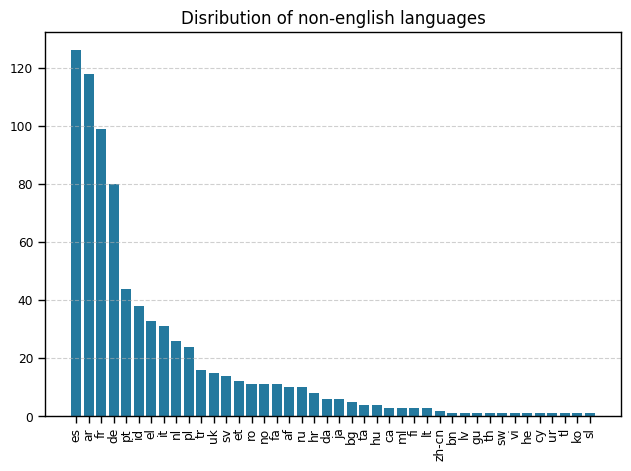

In [16]:
#Create new column for book's language 
def get_language(idx):
    try:
        #detect language of book details 
        return detect(df['book_details'].iloc[idx])
    except:
        #infer from the book title
        return detect(df['book_title'].iloc[idx])
    
df['language'] = [get_language(idx) for idx in range(len(df.index))]

#preview sample 
display(df[['book_title', 'language']].sample(5))
print()

#Report number of languages in the dataset 
print('Number of languages featured in the dataset: ', len(df['language'].unique()))
print()

#plot the distribution of non-english books in the dataset
plt.bar(df['language'].value_counts().index[1:], df['language'].value_counts().values[1:], color='#24799e')
plt.title('Disribution of non-english languages', fontsize=12)
plt.xticks(rotation=90, fontsize=8.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<a id="exploratory-data-analysis"></a>
## Part Three: Exploratory Data Analysis 
<br>

In this section, I will explore the dataset in more detail, performing some further data analysis and visualization to get familiar with the data and delineate some of the underlying relationships. I will examine the most common book genres in the data, the most top rated books, the rating distribution and the relationship between user ratings and user reviews.
<br>
<br>

**Top 20 book genres featured in the data**



In [17]:
#Create one-hot encoded dataframe with all unique genres in the data
genres_df = df['genres'].str.get_dummies(', ').astype(int)

#preview genres dataframe
genres_df.head()


12th Century  13th Century  15th Century  16th Century  17th Century  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   18th Century  19th Century  1st Grade  20th Century  21st Century  ...  \
0             0             0          0             0             0  ...   
1             0             0          0             0             0  ...   
2             0             0          0             0             0  ...   
3             0             0          0             0             0  ...   
4             0             0          0             0             0  ...   

   X Men  Yaoi  Young Adult  Young Adult Contemporary  Young Adult Fantasy  \
0      0     0            1                         0                    0   
1      0     0            1                         0                    0   
2      0     0            1                         0                    0   
3      0     0            1                         0                    0   
4      0     0            1                         0                    0   

   Young Adult Historical Fiction  Young Adult Paranormal  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   Young Adult Romance  Zimbabwe  Zombies  
0                    0         0        0  
1                    0         0        0  
2                    0         0        0  
3                    0         0        0  
4                    0         0        0  

[5 rows x 727 columns]

We can see here we have a total of 727 unique genre classifications! Now, I will identify and present the top 20 most features book genres.

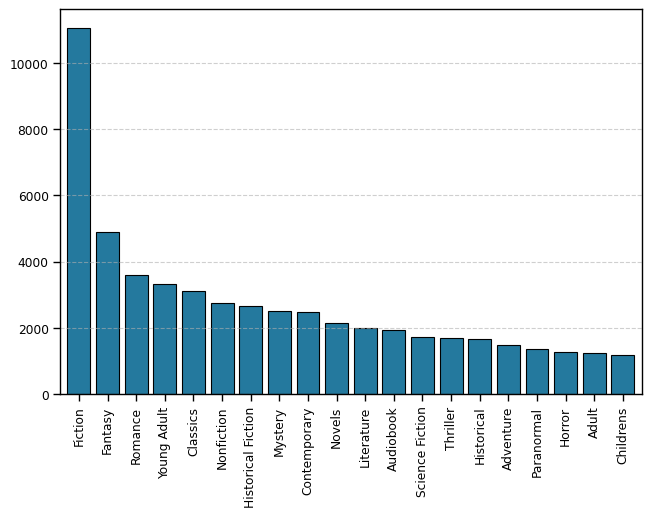

In [18]:
#Extract top 20 genres by genre frequency
top20_genres = genres_df.sum().sort_values(ascending=False)[:20]

#Visualize top 20 genres using bar chart
top20_genres.plot(kind='bar', color='#24799e', width=.8, figsize=(7.5,5),
                    linewidth=.8, edgecolor='k', rot=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Top 10 books on Goodreads**

In [19]:
#Assign appropriate data type to the rating distribution column
df['rating_distribution'] = df['rating_distribution'].apply(lambda x: eval(x))

#get total number of five star ratings per book from the rating distribution column
df['total_5star_ratings'] = [int(dic['5'].replace(',','')) for dic in df['rating_distribution']]

#sort data by books with highest frequency of 5 star ratings
top10_books = df.sort_values(by='total_5star_ratings', ascending=False).iloc[:10][['book_title', 'author', 'genres', 'cover_image_uri']].reset_index(drop=True)

#report the results table
top10_books.iloc[:,:3]


book_title           author  \
0     Harry Potter and the Sorcerer's Stone     J.K. Rowling   
1                          The Hunger Games  Suzanne Collins   
2                     To Kill a Mockingbird       Harper Lee   
3  Harry Potter and the Prisoner of Azkaban     J.K. Rowling   
4      Harry Potter and the Deathly Hallows     J.K. Rowling   
5       Harry Potter and the Goblet of Fire     J.K. Rowling   
6                    The Fault in Our Stars       John Green   
7                                  Twilight  Stephenie Meyer   
8                       Pride and Prejudice      Jane Austen   
9   Harry Potter and the Chamber of Secrets     J.K. Rowling   

                                                                                       genres  
0                    Fantasy, Fiction, Young Adult, Magic, Childrens, Middle Grade, Audiobook  
1           Young Adult, Fiction, Fantasy, Science Fiction, Teen, Audiobook, Post Apocalyptic  
2          Classics, Fiction, Historical Fiction, School, Literature, Young Adult, Historical  
3                    Fantasy, Fiction, Young Adult, Magic, Childrens, Middle Grade, Audiobook  
4                       Fantasy, Young Adult, Fiction, Magic, Childrens, Adventure, Audiobook  
5                    Fantasy, Young Adult, Fiction, Magic, Childrens, Audiobook, Middle Grade  
6                  Young Adult, Fiction, Contemporary, Realistic, Teen, Coming Of Age, Novels  
7            Fantasy, Young Adult, Romance, Fiction, Vampires, Paranormal, Paranormal Romance  
8  Fiction, Historical Fiction, Historical, Literature, Audiobook, Novels, Historical Romance  
9                    Fantasy, Fiction, Young Adult, Magic, Childrens, Middle Grade, Audiobook

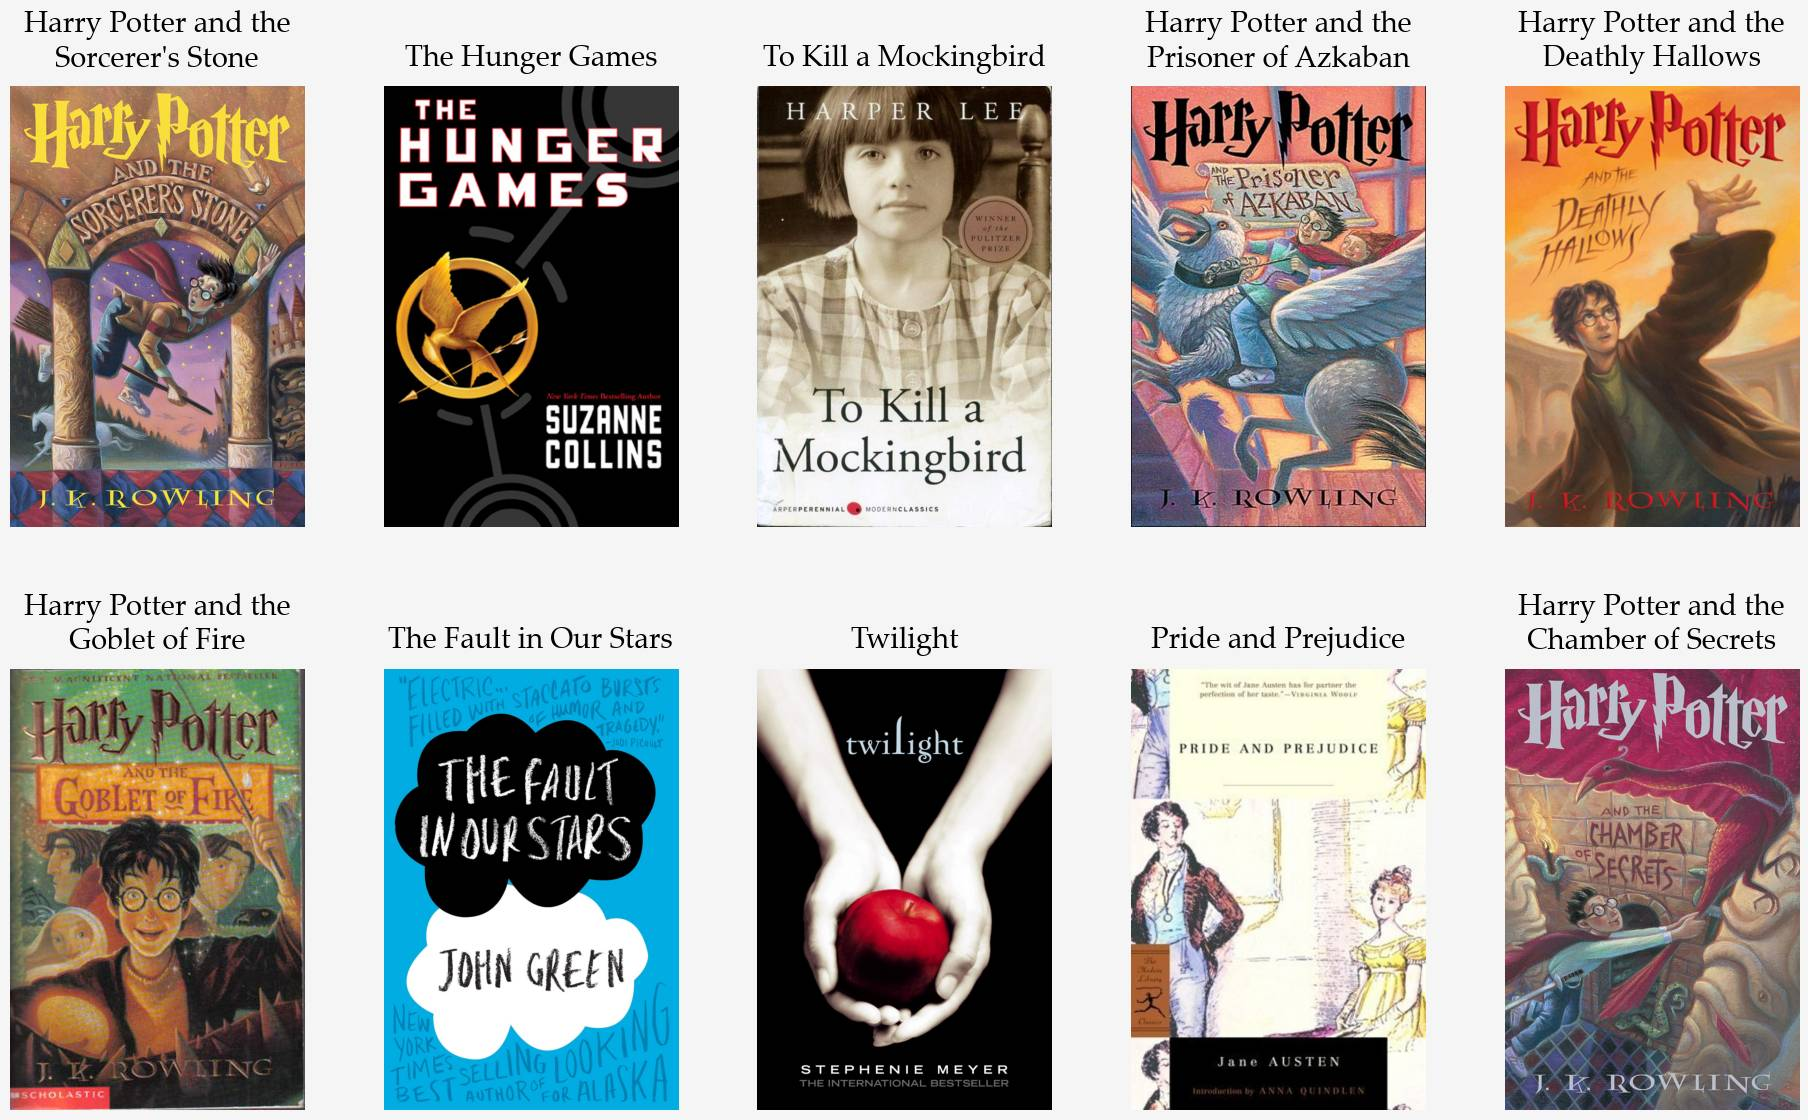

In [20]:
#get and display books by cover
get_covers(top10_books)


**Distribution of rating scores**

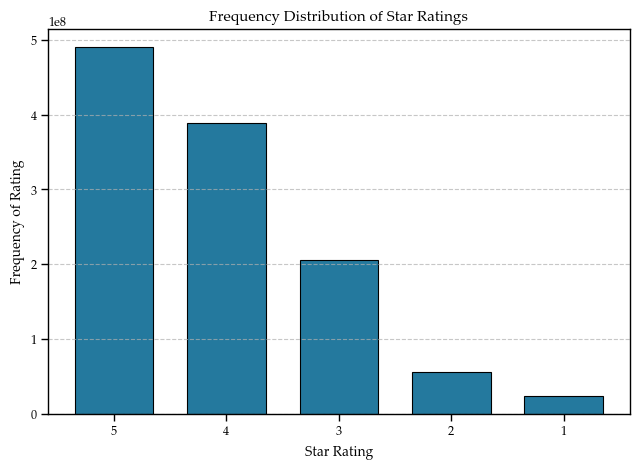

In [21]:
#Aggregate ratings by rating star 
rating_counts = {'5':0, '4':0, '3':0, '2':0, '1':0}
for ratings in df['rating_distribution']:
    for key, value in ratings.items():
        rating_counts[key] += int(value.replace(',',''))

#plot the ratings frequency distribution
plt.figure(figsize=(7.5,5))
plt.bar(rating_counts.keys(), rating_counts.values(), color='#24799e', width=.7, linewidth=.8, edgecolor='k')
plt.title('Frequency Distribution of Star Ratings', fontsize=11)
plt.xlabel('Star Rating', fontsize=10)
plt.ylabel('Frequency of Rating', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=.7)
plt.show()


**Relationship between number of ratings and average rating score**


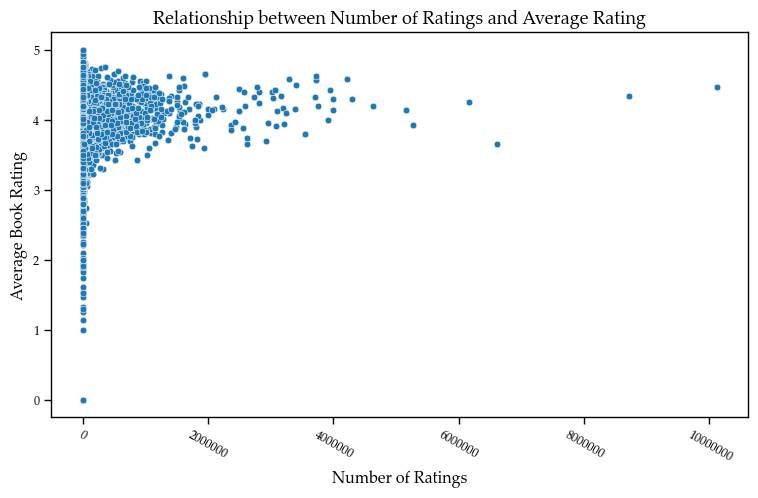

In [22]:
#Visualize the relationship between the number of ratings and the average rating 
# score for a given book using scatter plot
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='num_ratings', y='average_rating')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=-30)
plt.title('Relationship between Number of Ratings and Average Rating', fontsize=13)
plt.xlabel('Number of Ratings', fontsize=11.5)
plt.ylabel('Average Book Rating', fontsize=11.5)
plt.show()


As depicted by the above plot, there is a positive relationship between the number of ratings and the average rating score of a given book. Users generally tend to give more ratings if find the book favorable and deserving of a high rating score. Now that we have gathered an overview of the data, I will next move to text preprocessing and performing some feature engineering to prepare the data from modeling and processing.

<a id="text-preprocessing"></a>
## Part Four: Text Preprocessing 
<br>

In this section, I will carry out important text preprocessing procedures to ensure the text data is ready for modeling and analysis. First, I will perform feature combination (e.g., title, genre, book description), creating a new column `'combined_features'` that combines all the important or relevant book features together, which would be crucial for subsequent analysis. After obtaining the combined features for all books in the dataset, I will perform each of the following:
 1. Removing punctuations and whitespaces in the text and lowercasing.
 2. Removing stop words, words such as “the,” “and,” “in,” “for,” “where,” “when,” “to,” etc.
 3. Lemmatizing the text, particularly lemmatizing nouns, verbs, and adverbs, reducing them to their dictionary root. 
 4. Text Tokenization, converting sentence sequences into sequences of numerical representations (tokens) viable for analysis.
 5. Sequence Padding, ensuring all sequences are of the same size. For padding, I will take the 95th percentile of description lengths to leave out outlier or overly long book descriptions.
<br>

Further, given that, as illustrated earlier, we have several different languages in the dataset (43 languages in total), I will perform each of these steps across all languages, to the degree they're supported by a given library for given task. This will ensure a uniformity in preprocessing to make the recommender equally functional for users speaking different languages.
<br>
<br>

**Feature Combination**

In [23]:
#Combine features for ovarall text processing
df['combined_features'] = (df['book_title'] + ' / ' + df['author'] + ' / ' + df['publication_year'] + ' / ' + df['genres'] + ' / ' + df['book_details'])

#preview a sample of the combined features column
for row in df['combined_features'][10:15]:   #book 10 to 15
    print(row[:200],'\n')


In a Sunburned Country / Bill Bryson / 2000 / Travel, Nonfiction, Humor, Australia, Memoir, Audiobook, History / It is the driest, flattest, hottest, most infertile and climatically aggressive of all  

I'm a Stranger Here Myself: Notes on Returning to America After Twenty Years Away / Bill Bryson / 1998 / Nonfiction, Travel, Humor, Memoir, Essays, Biography, Audiobook / After living in Britain for t 

The Lost Continent: Travels in Small-Town America / Bill Bryson / 1989 / Travel, Nonfiction, Humor, Memoir, Audiobook, American, Biography / 'I come from Des Moines. Somebody had to'And, as soon as Bi 

Neither Here nor There: Travels in Europe / Bill Bryson / 1991 / Travel, Nonfiction, Humor, Memoir, Biography, Audiobook, Travelogue / Bill Bryson's first travel book, The Lost Continent, was unanimou 

Notes from a Small Island / Bill Bryson / 1995 / Travel, Nonfiction, Humor, Memoir, British Literature, Biography, Audiobook / "Suddenly, in the space of a moment, I realized what it was t

In [24]:
books_data = df['combined_features']   #I will now use this going forward

**Removing punctuations, removing whitespaces, and lowercasing**

In [25]:
#Remove punctuations and normalize text 
books_data = books_data.apply(lambda text: ' '.join(re.findall(r'\b\w+\b', text.lower().strip())))

#preview sample 
books_data[10:15] 

10    in a sunburned country bill bryson 2000 travel nonfiction humor australia memoir audiobook histo...
11    i m a stranger here myself notes on returning to america after twenty years away bill bryson 199...
12    the lost continent travels in small town america bill bryson 1989 travel nonfiction humor memoir...
13    neither here nor there travels in europe bill bryson 1991 travel nonfiction humor memoir biograp...
14    notes from a small island bill bryson 1995 travel nonfiction humor memoir british literature bio...
Name: combined_features, dtype: object

**Removing stop words** 

In [26]:
#Create dictionary for storing language-stopwords pairs
stopwords_multilang = {lang: stopwords.stopwords(lang) for lang in stopwords.langs()}

#Define function to remove stop words for text of a given language 
def remove_stopwords(text,  stopwords_multilang, language=None):
    if language is None:
        language = detect(text)
    filtered_text = [word for word in text.split() if word not in stopwords_multilang.get(language,{})]
    return ' '.join(filtered_text)

#Remove stop words 
books_data = pd.Series([remove_stopwords(books_data[i], stopwords_multilang, language=df['language'].iloc[i]) for i in range(len(books_data))])
books_data[10:15] 


10    sunburned country bryson 2000 travel nonfiction humor australia memoir audiobook history driest ...
11    stranger notes returning america bryson 1998 nonfiction travel humor memoir essays biography aud...
12    lost continent travels town america bryson 1989 travel nonfiction humor memoir audiobook america...
13    travels europe bryson 1991 travel nonfiction humor memoir biography audiobook travelogue bryson ...
14    notes island bryson 1995 travel nonfiction humor memoir british literature biography audiobook s...
dtype: object

**Lemmatization** <br>
<br>
Now, I will perform lemmatization which involves reducing certain words to their base or root form (e.g., 'thinking' becomes 'think'). Given the current context, since our goal is to appropriately represent the semantic meaning of the book descriptions, I will perform lemmatization on nouns, verbs and adverbs only, leaving adjectives, especially as books' themes or genre are generally more heavily dependent on adjectives than the others, and as they generally carry important meanings about the book. To do so, I will use nltk's Word Net Lemmatizer for english books, and stanza to lemmatize non-english ones.

In [27]:
#First, I will create a dictionary with the languages in the dataset
lang_dict = {}
lang_dict = lang_dict.fromkeys(df['language'].unique())

#Assign a lematization model for each language separately, using nltk for english and stanza for non-english
for lang in list(lang_dict.keys())[1:]:
    try:
        #assign model if the language is supported 
        lang_dict[lang] = stanza.Pipeline(lang=lang, processors='tokenize,pos,lemma', verbose=0)
    except:
        lang_dict[lang] = None

#get supported languages 
supported_langs = [key for key,val in lang_dict.items() if val is not None]
print('Number of languages supported:', len(supported_langs)+1)
print('Number of languages not supported:', len(lang_dict)-len(supported_langs)-1)


2025-02-28 09:27:14 ERROR: Cannot load model from C:\Users\mmd19\stanza_resources\th\pos\default.pt


Number of languages supported: 36
Number of languages not supported: 7


In [28]:
#Initiate english lemmatizer 
en_lemmatizer = WordNetLemmatizer()

#Define function to lemmatize text
def lemmatize_text(text, language=None):
    if language is None:
        language = detect(text)
    #nltk is best for english 
    if language=='en':
        text = [en_lemmatizer.lemmatize(word, pos='v') for word in text.split()]
        text = [en_lemmatizer.lemmatize(word, pos='r') for word in text]
        return ' '.join([en_lemmatizer.lemmatize(word, pos='n') for word in text])
    #otherwise, use stanza if language is supported
    elif language in supported_langs:  
        nlp = lang_dict[language]
        doc = nlp(text).iter_words()
        return ' '.join([word.lemma if word.upos in ('ADV', 'NOUN', 'VERB') else word.text for word in doc])
    else:
        return text 

#Lemmatize the books 
books_data = pd.Series([lemmatize_text(books_data[i], language=df['language'].iloc[i]) for i in range(len(books_data))])

# #preview sample 
books_data[10:15] 


10    sunburn country bryson 2000 travel nonfiction humor australia memoir audiobook history driest fl...
11    stranger note return america bryson 1998 nonfiction travel humor memoir essay biography audioboo...
12    lose continent travel town america bryson 1989 travel nonfiction humor memoir audiobook american...
13    travel europe bryson 1991 travel nonfiction humor memoir biography audiobook travelogue bryson t...
14    note island bryson 1995 travel nonfiction humor memoir british literature biography audiobook su...
dtype: object

**Text tokenization**

In [29]:
#Tokenize text
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(books_data)

#get indices per tokens and report vocabulary size 
word2idx = tokenizer.word_index 
idx2word = {idx: word for word, idx in word2idx.items()}
vocab_size = len(word2idx) + 1 
print('vocabulary size:', vocab_size)
print()

#convert the text into sequences of word indice  
books_data = tokenizer.texts_to_sequences(books_data)

#Confirm if the words and tokenized correctly using the idx2word dictionary 
#decode sample book description 
print([word_idx for word_idx in books_data[10]][:20])
print(' '.join([idx2word[word_idx] for word_idx in books_data[10]][:20]))

vocabulary size: 80516

[19303, 140, 3932, 528, 104, 25, 81, 1786, 71, 43, 18, 22814, 39617, 3826, 28507, 39618, 6178, 1862, 1591, 1786]
sunburn country bryson 2000 travel nonfiction humor australia memoir audiobook history driest flattest hottest infertile climatically aggressive inhabit continent australia


**Sequence padding**

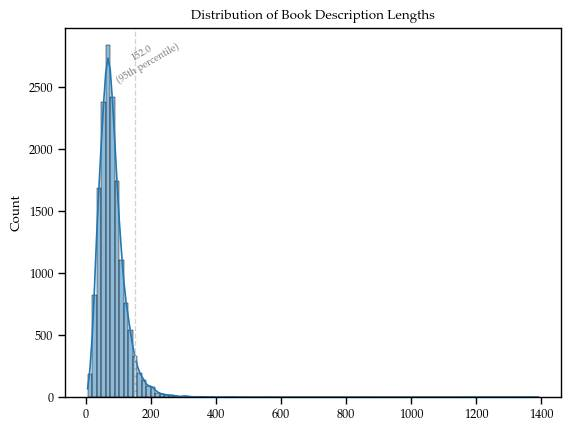

Books data shape: (15465, 152)


In [30]:
#Check the sequence length distribution in the data
seq_lengths = [len(seq) for seq in books_data]

#show distribution of book description lengths
perc = np.percentile(seq_lengths, 95)
sns.histplot(seq_lengths, bins=100, kde=True)
plt.title('Distribution of Book Description Lengths')
plt.axvline(perc, linestyle='--', color='lightgray', linewidth=1, label=f'95th percentile: {perc:.2f}')
plt.text(perc*1.2, plt.gca().get_ylim()[1] * 0.85, f'{perc:.1f}\n(95th percentile)', rotation=30, color='gray', ha='center', fontsize=7)
plt.show()

#Now, I will identify the maximum sequence length for padding as the 95th percentile
max_seq_len = int(np.percentile(seq_lengths, 95))

#Sequence Padding
books_data = pad_sequences(books_data, maxlen=max_seq_len, padding='post', truncating='post')

#Report data shapes after padding
print('Books data shape:', books_data.shape)


<a id="model-development-and-training"></a>
## Part Five: Model Development and Training 

In this section, I will develop and train a recurrent neural network to train on the books dataset, learn the relationships between the different book embeddings and produce accurate book recommendations on the basis of similarity. This network will consist of an embedding layer to learn word embeddings, a bidirectional LSTM layer for context awareness and representing semantic dependencies, an attentional layer for word relevance, two dense layers to carve out the final representation space, as well as layer-normalization and global pooling layers applied as necessary (*see full architecture below*). <br>

In order to train the model, I will employ "triplet loss". Triplet loss is a commonly used loss function in machine learning for training neural networks to differentiate better between distinct classes, minimizing the distance between similar ones while maximizing the distance between dissimilar ones. By minimizing triplet loss over time, the neural network should come to better organize its representation space such that the gaps between similar embeddings are smaller than the gaps between the dissimilar ones thus learning word embedding, carving out and organizing the embedding representation space in one shot. The better the network is able to distinguish between similar and dissimilar pairs of books, the better it can be said to have learned the book embeddings and the better it will be for generating apt or reasonable recommendations. So for text embedding and representation the network will learn through minimizing triplet loss.
<br>
<br>

### Preparing Training Data and Loss Function <br>

Now I will proceed with preparing the training data by performing triplets mining. Triplets mining involves breaking down the training dataset to 3 different groups of items, <i>triplets</i>. Each triplet consists of an "anchor" item (an item picked at random), a "positive" item (an item similar to the anchor), and a "negative" item (an item dissimilar from the anchor). As many triplets are generated for as many items we have in the dataset. In the current context, triplets will be generated by obtaining an anchor book, and, on the basis of cosine distance similarity, two other books, one similar to the anchor, a positive book, and another dissimilar one, a negative book. The objective of training would be to teach the network to accurately differentiate between similar and dissimilar books, recognizing that the positive is similar to the anchor while the negative is dissimilar to it. This will involve two mean squared error computations, one quantifying the (euclidean) distance between the similar pairs (anchor and positive) and the other quantifying the distance between the dissimilar pairs (anchor and negative). Their mean will then make up the triplet loss. Through backpropagation, the network will learn and map out the representation space through minimizing triplets loss over training epochs. <br>
<br>
As such, I will first start by synthesizing the training data, generating book triplets for training. Now, for fine-grained selection and mining, I will use a two-step process: first, vectorizing the books descriptions using scikit-learn's <i>Term Frequency - Inverse Document Frequency</i> (TF-IDF) vectorizer, which quantifies word importances, weighing the importances of terms in relation to the description of a single book and relative to the descriptions of other books, thus giving us a rough estimate of the similarities between books based on their content. Then, second, I will apply cosine similarity on the obtained matrix to measure the similarities between the book vectors. Further to force the network to learn better, I implement a hard or semi-hard triplet mining strategies, defining two respective margins, one very modest and the other moderately modest, for drawing the negatives, ensuring the negative samples selected are not widely different from the positive ones, thus making training more difficult for the networks, but, will they manage to differentiate between books successfully, arguably more fruitful. These mining strategies will be decided from the data distribution itself, using percentile cutoffs. For the positives, I will draw from the data above the 90th percentile of similarity (i.e. top 10% similar samples to the anchor); this will be the positives mining range. For the negatives, the hard mining margin will be defined as the 5% similarity range below the positives mining range (95th percentile - 85th percentile), whilst the soft, or actually semi-hard, mining margin will be defined as the 25% similarity range below the positives mining range (95th percentile - 70th percentile). These margins will be dynamic, decided relative to each individual anchor. 

**Triplets Mining**

In [31]:
#prepare books descriptions for TF-IDF vectorization
book_descriptions = []
for seq in books_data: 
    #exclude 0s (the padding) and convert tokens back to words
    words = [idx2word[token] for token in seq if token != 0]
    book_descriptions.append(' '.join(words))

#Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

#fit and transform the books descriptions to get a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(book_descriptions)

#Now compute cosine similarity on the TF-IDF matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

#Get a statistical summary of the similarity matrix 
mask = ~np.eye(similarity_matrix.shape[0], dtype=bool)
q25, q50, q75 = np.percentile(similarity_matrix[mask], [25, 50, 75]) 
print(f'Similarity range: {np.max(similarity_matrix):.5f} - {np.min(similarity_matrix):.5f}')
print("25th percentile:", q25.round(4))
print('50th percentile:', q50.round(4))  
print("75th percentile:", q75.round(4))
print("IQR:", (q75 - q25).round(4))


#Preparing triplets for training
#create list to store triplets' indices 
triplets_indices = []

#Controlling for outliers 
avg_similarities = np.mean(similarity_matrix, axis=1)
outliers = np.where(avg_similarities > np.percentile(avg_similarities, 99))[0]

#Loop over each anchor sample and store triplets' indices
for anchor_idx in range(len(books_data)):
    if anchor_idx in outliers: 
        continue
    similarity_scores = similarity_matrix[anchor_idx]
    similarity_scores[anchor_idx] = -np.inf  #ignore self-similarity
    
    #Specify threshold for selection of positive samples 
    pos_threshold = np.percentile(similarity_scores, 95)   #to sample from top 5% similarity range 

    #specify triplets mining margin for negative samples 
    hard_mining_margin = np.percentile(similarity_scores, 95) - np.percentile(similarity_scores, 85)   #to sample from the 10% similarity range below the positives 
    soft_mining_margin = np.percentile(similarity_scores, 95) - np.percentile(similarity_scores, 70)    #to sample from the 25% similarity range below the positives 


    #Specify range for positives and obtain positive sample (from the top 5%)
    positives_range = np.where(similarity_scores >= pos_threshold)[0]  
    if len(positives_range) == 0: 
        continue 
    positive_idx = np.random.choice(positives_range)
    positive_scores = similarity_scores[positive_idx]

    #Specify range for negatives and obtain negative sample (either from the 10% or 25% similarity range below the positives)
    negatives_range = np.where((similarity_scores < positive_scores) & (similarity_scores >= positive_scores - hard_mining_margin))[0]
    if len(negatives_range) == 0:
        negatives_range = np.where((similarity_scores < positive_scores) & (similarity_scores >= positive_scores - soft_mining_margin))[0]
        if len(negatives_range) == 0:
            continue
    negative_idx = np.random.choice(negatives_range)
    
    #append triplets 
    triplets_indices.append((anchor_idx, positive_idx, negative_idx))

#convert to numpy array and report number of generated triplets 
triplets_indices = np.array(triplets_indices)
print(f"\nGenerated {len(triplets_indices)} triplets using cosine similarity")


#Create triplets dataset for training 
triplets_dataset = tf.data.Dataset.from_tensor_slices(({
        'anchor_input': books_data[triplets_indices[:, 0]],
        'positive_input': books_data[triplets_indices[:, 1]],
        'negative_input': books_data[triplets_indices[:, 2]]}, 
        np.zeros((len(triplets_indices),128)))) 

#set batch size and enable prefetching 
triplets_dataset = triplets_dataset.batch(64).prefetch(tf.data.AUTOTUNE)


Similarity range: 1.00000 - 0.00000
25th percentile: 0.0031
50th percentile: 0.009
75th percentile: 0.0179
IQR: 0.0148

Generated 15260 triplets using cosine similarity


**Triplet loss function**

In [ ]:
#Define custom triplet loss function
def triplet_loss(margin=1.0):
    def loss(y_true, y_pred):
        #Get triplets' embeddings 
        anchor_embeddings, positive_embeddings, negative_embeddings = y_pred[0], y_pred[1], y_pred[2]

        #Calculate mean squared distances
        pos_distance = tf.reduce_sum(tf.square(anchor_embeddings - positive_embeddings), axis=-1)
        neg_distance = tf.reduce_sum(tf.square(anchor_embeddings - negative_embeddings), axis=-1)

        #Calculate loss (with margin constraint)
        basic_loss = pos_distance - neg_distance + margin 
        return tf.reduce_mean(tf.maximum(basic_loss, 0.0))
    return loss


### Model Development <br>

Proceeding at last to model building, I will build a recurrent neural network to process and model the books dataset, performing word embedding, context learning, relevance tagging and building up a representation space representing the embeddings of the book descriptions in the dataset. This network will consist primarily of the following layers: <br>
<div style="padding-left: 1em; max-width: 1350px;">
<p style="line-height: 1.5;">

**(1) Embedding layer:** embedding layer for word embedding, that is, to represent semantic relationships between book descriptors in the data. This layer will utilize GloVe's pretrained embeddings. <br>

**(2) Long Short-Term Memory (LSTM) layer:** this is a type of recurrent neural network layer designed to capture temporal dependencies, or in this case "semantic dependencies" between items in a sequence, such as text sequences or sentences, and establish context. I will also make it bidirectional, so that past and future contexts are encoded, not just past ones. This should result in a richer context for understanding the book embeddings and identifying the similarities between books. <br>

**(3) Self-Attention layer:** a scaled dot-product attention layer to assign word importances for words relative to their sequences, adding more weight to the most important or relevant words in a given sequence, which should help the network identify and zero-in on the most relevant descriptors for a given book. <br>

**(4) Dense layers**: two fully-connected dense layers to represent the data more concisely, making up the final embeddings representation space. <br>

<br>

<i>I will also supply it with layer-normalization layers and global averaging pooling layer after the attentional layer.</i>
</p></div>
<br>

**The following flowchart illustrates the full model architecture**: <br>

<br>

<pre>
                                                  Input
                                           (book descriptions)
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │         Embedding Layer            │
                                   │ (input=vocab_size, output=300 dims)│
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │     Bidirectional LSTM Layer       │
                                   │     (128 units per direction,      │
                                   │      return_sequences=True)        │
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │       Layer  Normalization         │
                                   │        (post-LSTM Layer)           │
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │       Self-Attention Layer         │
                                   │   (Scaled dot-product attention)   │
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │     Global Average Pooling 1D      │
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │          Dense Layer 1             │
                                   │        (256 units, ReLU)           │
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │       Layer Normalization          │
                                   │       (post-Dense Layer 1)         │
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                   ┌────────────────────────────────────┐
                                   │          Dense Layer 2             │
                                   │        (128 units, ReLU)           │
                                   └────────────────────────────────────┘
                                                    │
                                                    ▼
                                          Output Embeddings (128 dims)
</pre>


<br>

Now in order to give the model a head start and facilitate learning, I will use [GloVe (Global Vectors for Word Representation)]((https://nlp.stanford.edu/projects/glove/)) and utilize its pre-trained embeddings instead of learning word semantic representations from scratch. GloVe's embedding vectors have been trained on a very large text corpus with 840 billion tokens which thus already capture a lot of general language understanding and semantic relationships between words, such that words with similar meanings have similar vector representations. This will take off a lot of the heavy lifting of learning word meanings from scratch. This will then feed into the LSTM layer, the core of the model. LSTM is particularly powerful for handling sequential data (like text) with temporal dependencies between them as well as capturing long-term dependencies as training progresses, which allows it to learn context not just word representations. It will also be bidirectional, meaning it will take into account past as well as present and future context, which seems fitting for our current case since we're analyzing book descriptions. Finally, to enhance its capability, a self-attention layer is added, which helps zero-in on the most important words in a sequence. This layer computes an "attention score" for each element in the sequence outputed by the LSTM layer, which assigns added weight or importance to certain words in the sequence before feeding it forward to the next layers. This helps the model thereby focus on the most relevant parts of the sequence, that is, the most important descriptors for a given book. Finally, since I am using triplets, this will warrant using 3 input channels and 3 output channels. As such, I will define an overarching triplet model that takes the base LSTM model and wrap it within a larger triplet model that takes the 3 inputs and generates the 3 outputs required for triplet training. Following the completion of training, the base LSTM model will then be extracted separately and used for the book recommender.

**Preparing Embeddings using GloVe**

In [33]:
#Define embeddings dimensions 
embedding_dims = 300 

#Create embeddings matrix using GloVe 
#build embeddings index from GloVe file
embeddings_index = {}
with open('glove.840B.300d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector_values = values[1:]
        if len(vector_values) > embedding_dims:
            vector_values = vector_values[-embedding_dims:]
        coefs = np.asarray(vector_values, dtype='float32')
        embeddings_index[word] = coefs

#Create embedding matrix 
embedding_matrix = np.zeros((vocab_size, embedding_dims))
for word, idx in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector


**Building Triplet LSTM Model**

In [41]:
#Define self-attention layer 
class SelfAttentionLayer(layers.Layer):
    def call(self, inputs):
        #query, key, value 
        Q, K, V = inputs, inputs, inputs     
        #scaling factor 
        d_k = tf.cast(tf.shape(K)[-1], tf.float32) 
        #compute attention weights 
        attention_weights = tf.nn.softmax(tf.matmul(Q, K, transpose_b=True) / tf.sqrt(d_k), axis=-1)
        return tf.matmul(attention_weights, V)  #attention vectors


#Define model subclass to build and train a triplet recurrent neural network 
class Triplet_LSTM_Model(tf.keras.Model):
    def __init__(self, input_dims, embedding_dims=300, vocab_size=50000, LSTM_units=128, dense_units=(128,64), **kwargs):
        '''
        :param int input_dims: Number of input dimensions. Positional parameter.
        :param int embedding_dims: Number of embedding dimensions for the embedding layer. Default is 300 dims.
        :param int vocab_size: Size of the input vocabulary for the embedding layer. Default is 50,000 words.
        :param int LSTM_units: Number of units for the bidirectional LSTM layer. Default is 128 units.
        :param tuple dense_units: Number of units for the two dense layers following the attentional layer. Default is (128,64).
        '''

        super().__init__(**kwargs)
        #Initialize parameters 
        self.input_dims = input_dims 
        self.embedding_dims = embedding_dims 
        self.embedding_input = vocab_size 
        self.LSTM_units = LSTM_units 
        self.dense_units = dense_units
        self.name = 'Triplet_LSTM_Model'        
        #Initialize attention layer and models used
        self.Attention_layer = SelfAttentionLayer(name='SelfAttention_layer')
        self.LSTM_network = self._build_LSTM_network()
        self.Triplet_Model = self._build_triplet_model()


    def _build_LSTM_network(self):
        #Build LSTM model 
        model_inputs = layers.Input(shape=(self.input_dims,), name='Input_layer')
        x = layers.Embedding(input_dim=self.embedding_input, output_dim=self.embedding_dims, weights=[embedding_matrix], 
                             trainable=True, mask_zero=True, name='Embedding_layer')(model_inputs)
        x = layers.Bidirectional(
            layers.LSTM(self.LSTM_units, activation='tanh', kernel_initializer='lecun_uniform', 
            return_sequences=True, recurrent_initializer='orthogonal', name='LSTM_layer'), name='Bidirectional_layer')(x)
        x = layers.LayerNormalization(epsilon=1e-6, name='LayerNorm_post_LSTM')(x)
        x = self.Attention_layer(x)
        x = layers.GlobalAveragePooling1D(name='GlobalAvgPooling1D')(x)
        x = layers.Dense(self.dense_units[0], activation='relu', kernel_initializer='he_uniform', name='Dense_layer1')(x)
        x = layers.LayerNormalization(epsilon=1e-6, name='LayerNorm_post_Dense1')(x)
        model_outputs = layers.Dense(self.dense_units[1], activation='relu', kernel_initializer='he_uniform', name='Dense_layer2')(x)
        return tf.keras.Model(inputs=model_inputs, outputs=model_outputs, name='LSTM_model')


    def _build_triplet_model(self):
        #Build triplets model 
        base_model = self.LSTM_network
        #Define input layers
        anchor_input = layers.Input(shape=(self.input_dims,), name='anchor_input')
        positive_input = layers.Input(shape=(self.input_dims,), name='positive_input')
        negative_input = layers.Input(shape=(self.input_dims,), name='negative_input')
        #Compute embeddings for each of the triplet
        anchor_output = base_model(anchor_input)
        positive_output = base_model(positive_input)
        negative_output = base_model(negative_input)

        #Build and return triplet model
        return tf.keras.Model(
                inputs=[anchor_input, positive_input, negative_input],
                outputs=[anchor_output, positive_output, negative_output],
                name='Triplet_Model')

    def call(self, inputs, training=None):
        #Model fitting function
        #Get anchor, positive, and negative inputs 
        #Handle dictionary inputs
        if isinstance(inputs, dict):
            anchor_input = inputs['anchor_input']
            positive_input = inputs['positive_input']
            negative_input = inputs['negative_input']
        else:
            #Handle list/tuple inputs
            anchor_input, positive_input, negative_input = inputs
        
        #Obtain and return triplets embeddings (y_pred)
        triplets_embeddings = self.Triplet_Model([anchor_input, positive_input, negative_input])
        return triplets_embeddings



### Model Training <br>

For model training, I will train the model for 25 epochs with early stopping and a learning rate scheduler to monitor the training process and reduce the learning rate if necessary or halt training early if it's no longer learning new information or has reached convergence. I will use the Adam (Adaptive Moment Estimation) optimizer and set a low learning rate for training stability, a modest expontential moving average of squared gradients (beta_2) to slightly increase sensitivity to recent gradient changes with triplet loss and thus to embeddings, and will apply clip norm to avoid vanishing gradients as typical in prolonged recurrent neural networks training.

Epoch 1/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 19122s 80s/step - loss: 11.0035 - learning_rate: 1.0000e-04
Epoch 2/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - loss: 2.3240 - learning_rate: 1.0000e-04
Epoch 3/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - loss: 0.7120 - learning_rate: 1.0000e-04
Epoch 4/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - loss: 0.2382 - learning_rate: 1.0000e-04
Epoch 5/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - loss: 0.1354 - learning_rate: 1.0000e-04
Epoch 6/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - loss: 0.2798 - learning_rate: 1.0000e-04
Epoch 7/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - loss: 0.0546 - learning_rate: 1.0000e-04
Epoch 8/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - loss: 0.0123 - learning_rate: 1.0000e-04
Epoch 9/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - loss: 0.0290 - learning_rate: 1.0000e-04
Epoch 10/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - loss: 0.1260 - learning_rate: 1.0000e-04
Epoch 11/25
239/239 ━━━━━━━━━━━━━━━

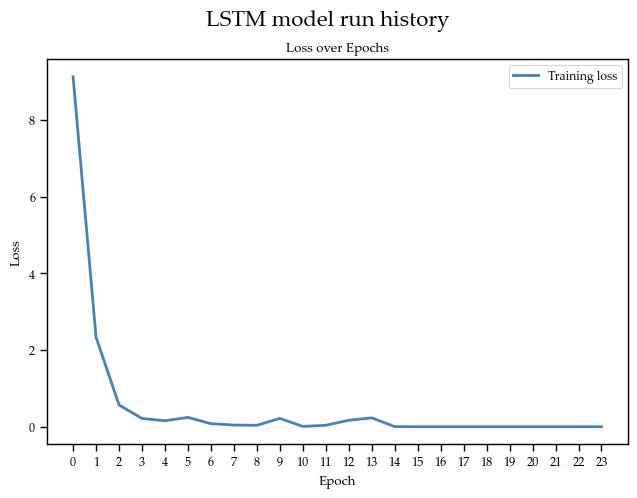

In [42]:
#Define model parameters 
input_dims = books_data.shape[1]   #sequence length
embedding_dims = 300
LSTM_units = 128 
dense_units = (256,128)

#Triplets model 
model = Triplet_LSTM_Model(input_dims=input_dims, embedding_dims=embedding_dims, vocab_size=vocab_size, LSTM_units=LSTM_units, dense_units=dense_units)

#Compile the model 
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.95, clipnorm=5.0), loss=triplet_loss(margin=4.0))

#Initialize learning rate schedule for the optimizer
reduceOnPleateau_lr = ReduceLROnPlateau(monitor='loss', mode='min', factor=0.8, min_delta=0.001, patience=4, min_lr=1e-6, verbose=1) 

#Define early stopping criterion
early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=8, start_from_epoch=10, restore_best_weights=True)

#Train the model
run_history = model.fit(triplets_dataset, epochs=25, batch_size=64, callbacks=[reduceOnPleateau_lr, early_stop], verbose=1)

#Visualize model's run history 
plot_training_history([run_history], ['loss'], 'LSTM model run history') 


As illustrated above, the network successfully learned to differentiate pairs of books on the basis of similarity and thus was successfully able to learn the book embeddings, with the triplet loss dropping close to 0.0 by the 16th epoch. This makes sense given that LSTM layers are designed to handle this type of data, accounting for long-term temporal dependencies between data like text with semantic dependencies. Next, I will use the LSTM model to extract the embeddings of the books in the dataset and once again and apply cosine similarity on the resulting embeddings in order to quantify similarities between the different book embeddings and accordingly use it as the basis for the book recommendation system.

**Identifying overall similarity**<br>
<br>
With training completed, I will measure and quantify the similarities between the book embeddings produced by the LSTM model using cosine similarity which would give us a matrix with the overall similarity between the different books based on their embeddings. Cosine scores typically range between 1 (perfect similarity) to 0 (no similarity at all). This will help us quickly look up the similarity between any two books: those pairs whose cosine similarity score are closest to 1 would be those most similar to each other.

In [ ]:
#Get embeddings model from the larger model trained with the triplets
embeddings_model = model.LSTM_network

#Save the final embeddings model
embeddings_model.save('embeddings_model.keras')

#load model with the custom attention layer 
#embeddings_model = tf.keras.models.load_model('embeddings_model.keras', custom_objects={'SelfAttentionLayer': SelfAttentionLayer})

#Get book embeddings 
book_embeddings = embeddings_model.predict(books_data)

#Compute cosine similarity on the embeddings for overall book similarity
overall_similarity_mtrx = cosine_similarity(book_embeddings)


484/484 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step


**Identifying genre similarity** <br>
<br>
Now I will create a similarity matrix however for genre alone (using jaccard distance similarity). This will help us balance raw book descriptions and genre-based recommendations. First, I will turn my genres dataframe into a sparse matrix for faster processing and then compute the jaccard distance similarity to obtain a similarity matrix for genre alone. Jaccard here seems an apt choice because it quantifies the similarity between sets of data, in this case sets of genre labels.


In [ ]:
#Convert genres_df to CSR matrix
genres_csr_mtrx = csr_matrix(genres_df.values).astype(bool).toarray()

#Compute jaccard distance similarity and return jaccard similarity matrix
genre_sim_mtrx = 1 - squareform(pdist(genres_csr_mtrx, metric=jaccard))

#normalize jaccard distance scores
genre_sim_mtrx = genre_sim_mtrx / np.max(genre_sim_mtrx) if np.max(genre_sim_mtrx) > 0 else genre_sim_mtrx


Now with all the data processed and analyzed throughly, I will build the main function for tailoring and delivering book recommendations.

<a id="building-a-book-recommendation-function"></a>
## Part Six: Building a Book Recommendation Function

In this section, I will develop a custom function for delivering personalized book recommendations. This function will constitute the heart of the book recommendation system. It will take a book title as input and return the most relevant book recommendations based off that book, utilizing and balancing the similarity matrices obtained, leveraging overall similarity as well as genre similarity. It will also be supplied with a special parameter, `alpha`, which specifies the exact balance between the two matrices, i.e., whether the recommendations should be tailored by genre similarity alone or overall similarity, or a mixture of both, and, if so, to which extent. It's will also feature another parameter, `top_n`, which specifies the exact number of book recommendations to return. The output would be a data table rendering the recommendation results as well as displaying each book by its cover in a sequential order. You can read the function's documentation for more details.
<br>
<br>

In [ ]:
#Define helper functions to return book recommendations
def Get_Recommendations(title: str, overall_sim_mtrx: np.ndarray, genre_sim_mtrx: np.ndarray, alpha=0.5, top_n=10):
    '''
    This function takes a book title and recommends similar books that cover similar themes
    or fall within the same genre categories.
    
    Parameters:
    - title (str): The title of the book for which recommendations are sought. 
    - overall_sim_mtrx (ndarray): A similarity matrix based on book overall similarities, where each row 
      corresponds to a book and each column corresponds to its cosine similarity score with other books.
    - genre_sim_mtrx (ndarray): A similarity matrix based on book genres, where each row
      corresponds to a book and each column corresponds to its jaccard similarity score with
      other books based on genre.
    - alpha (float, optional): Weighting factor for combining overall similarity and genre
      similarity. Defaults to 0.5, balancing overall similarity and genre similarity together.
    - top_n (int, optional): Number of recommendations to return. Defaults to 10.
    
    Returns:
    - Data table (Series) with recommended books and plot of each book with its cover.

    Raises:
    - TypeError: If the title provided is not a string.

    Notes:
    - This function filters, preprocesses and standardizes the book titles given, identifies its genre
      categories, importantly, identifying whether it's Fiction or Nonfiction work to prevent genre
      overall while looking for recommendations.
    - It looks for book recommendations by combining similarity scores from two matrices: overall_sim_mtrx
      (based on overall similarities) and genre_sim_mtrx (based on genre similarity).
    - It prioritizes books with similar genre categories; otherwise, it recommends book based on
      overall book similarity. However, the degree of each's influence can be controlled with the alpha parameter.
    - Finally, recommendations are filtered to include books by a different variety of authors, limiting
      the number of recommendations to only 5 books per one author.
    - The number of book recommendations can be adjusted using the 'top_n' parameter. Returns 10 book recommendations by default.
    '''

    #check if title provided is of the correct data type (string)
    try:
        curr_title = str(title)
    except:
        raise TypeError('Book title entered is not string.')

    #standardize titles for accurate comparisons
    title = curr_title.lower().strip()
    full_titles = df['book_title'].apply(lambda title: title.lower().strip())
    partial_titles = full_titles.str.extract(r'^(.*?):')[0].dropna()

    #check if provided title matches book title in the dataset and get index if found
    if title in full_titles.values:
        idx = df[full_titles == title].index[0]

    elif title in set(partial_titles.values):
        idx_partial = partial_titles[partial_titles == title].index[0]
        idx = df[df['book_title'] == df['book_title'].iloc[idx_partial]].index[0]

    else:
        #try normalizing book titles across the board by removing punctuations and performing some stemming on them
        normalized_title = re.sub(r'(^\s*(the|a)\s+|[^\w\s])', '', title, flags=re.IGNORECASE)
        normalized_title = re.sub(r'\b(\w+?)(s|ing)\b', r'\1', normalized_title, flags=re.IGNORECASE)
        normalized_full_titles = full_titles.apply(lambda title: re.sub(r'(^\s*(the|a)\s+|[^\w\s])', '', title, flags=re.IGNORECASE))
        normalized_full_titles = normalized_full_titles.apply(lambda title: re.sub(r'\b(\w+?)(s|ing)\b', r'\1', title, flags=re.IGNORECASE))
        normalized_partial_titles = partial_titles.apply(lambda title: re.sub(r'(^\s*(the|a)\s+|[^\w\s])', '', title, flags=re.IGNORECASE))
        normalized_partial_titles = normalized_partial_titles.apply(lambda title: re.sub(r'\b(\w+?)(s|ing)\b', r'\1', title, flags=re.IGNORECASE))
        #check title match
        if normalized_title in set(normalized_full_titles.values):
            idx = df[normalized_full_titles == normalized_title].index[0]

        elif normalized_title in set(normalized_partial_titles.values):
            idx_partial = normalized_partial_titles[normalized_partial_titles==normalized_title].index[0]
            idx = df[df['book_title'] == df['book_title'].iloc[idx_partial]].index[0]

        else:
            print(f'\nBook with title \'{curr_title}\' is not found. Please try a different book.\n', flush=True)
            return False


    #Check if 'Fiction' is in the genre of the selected book
    is_fiction = 'Fiction' in df['genres'].iloc[idx]

    #Find books with the same genre category
    if is_fiction:
        book_indices_ByGenre = [i for i in df.index if ('Fiction' in df['genres'].iloc[i]) and (i != idx)]
    else:
        book_indices_ByGenre = [i for i in df.index if ('Fiction' not in df['genres'].iloc[i] or 'Nonfiction' in df['genres'].iloc[i]) and (i != idx)]

    #Filter books to include books written in the same language as the target book
    book_indices_final = [i for i in book_indices_ByGenre if df['language'].iloc[i] == df['language'].iloc[idx]]
    
    #if empty, fallback to indices by genre 
    if not book_indices_final:
      book_indices_final = book_indices_ByGenre  


    #Combine the two similarity matrices using weighted sum
    weighed_similarity = (alpha * overall_sim_mtrx[idx]) + ((1 - alpha) * genre_sim_mtrx[idx])

    #Get cosine similarity scores for books with the same genre
    similarity_scores = [(i, weighed_similarity[i]) for i in book_indices_final]

    #Filter scores to only include books with the same genre (and language) category
    similarity_scores = [score for score in similarity_scores if score[0] in book_indices_final]

    #Sort the books based on the genre similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    #If less than top_n books are found in the same genre category, add books by closest overall cosine distance
    if len(similarity_scores) < top_n:
        cos_scores = list(enumerate(weighed_similarity[idx]))
        cos_scores = sorted(cos_scores, key=lambda x: x[1], reverse=True)
        cos_scores = [score for score in cos_scores if score[0] != idx and score[0] not in [x[0] for x in similarity_scores]]  #exclude the same book and already recommended books
        similarity_scores += [score for score in cos_scores if score not in similarity_scores][:top_n - len(similarity_scores)]  #add books until reaching top_n

    #Limit recommendations to 5 books per author
    author_counts = {}
    similarity_scores_filtered = []
    for score in similarity_scores:
        author = df['author'].iloc[score[0]]
        if author not in author_counts or author_counts[author] < 5:
            similarity_scores_filtered.append(score)
            author_counts[author] = author_counts.get(author, 0) + 1


    #Get the scores of the N most similar books
    most_similar_books = similarity_scores_filtered[:top_n]
    #Get the indices of the books selected
    most_similar_books_indices = [i[0] for i in most_similar_books]

    #Prepare DataFrame with recommended books and their details
    recommended_books = df.iloc[most_similar_books_indices][['book_title', 'author', 'cover_image_uri']]
    recommended_books['Recommendation'] = recommended_books.apply(lambda row: f"{row['book_title']} (by {row['author']})", axis=1)
    recommended_books['Genre'] = df.iloc[most_similar_books_indices]['genres'].apply(lambda x: x.split(', ')[0])
    recommended_books.reset_index(drop=True, inplace=True)

    #Return book recommendations
    print(f"\nRecommendations for '{curr_title.title()}' (by {df['author'].iloc[idx]}):", flush=True)
    display(recommended_books[['Recommendation','Genre']].rename(lambda x:x+1,axis=0))
    print('\n', flush=True)
    get_covers(recommended_books)
    return


<a id="testing-the-recommendation-system"></a>
## Part Seven: Testing the Recommendation System
<br>
In this section, I will test the book recommender just developed. As such, I will try 4 different tests. First, generating book recommendations for just one book with a popular title (e.g. Macbeth) to test the functionality of the recommender and get a general idea of how good it performs. Then I will generate recommendations for 5 titles picked at random from the dataset. Third, I will develop a custom function that takes a book title as input from the user and generates recommendations from it using the recommender. Lastly, I will develop a derivative recommender function that generates recommendations from user query: particularly, the user can enter any book description or describe a general theme or topic they want to learn about, and this recommender, using the neural network developed, will performing text embedding on the query, measure the similarities between the query given and the book descriptions in the dataset, and recommend the most relevant books back to the user. 


In [53]:
#Adjust pandas display settings to display entire column
pd.set_option('display.max_colwidth', None)

**Generating Book Recommendation for Famous Title**


Recommendations for 'Macbeth' (by William Shakespeare):


Recommendation  \
1                                       Othello (by William Shakespeare)   
2                                        Hamlet (by William Shakespeare)   
3                              Romeo and Juliet (by William Shakespeare)   
4                                     King Lear (by William Shakespeare)   
5                                             Oedipus Rex (by Sophocles)   
6                                                Antigone (by Sophocles)   
7                                   Dr. Faustus (by Christopher Marlowe)   
8                                As You Like It (by William Shakespeare)   
9                             Doubt, a Parable (by John Patrick Shanley)   
10  Hamlet: Screenplay, Introduction And Film Diary (by Kenneth Branagh)   

       Genre  
1   Classics  
2   Classics  
3   Classics  
4   Classics  
5   Classics  
6   Classics  
7   Classics  
8      Plays  
9      Plays  
10  Classics

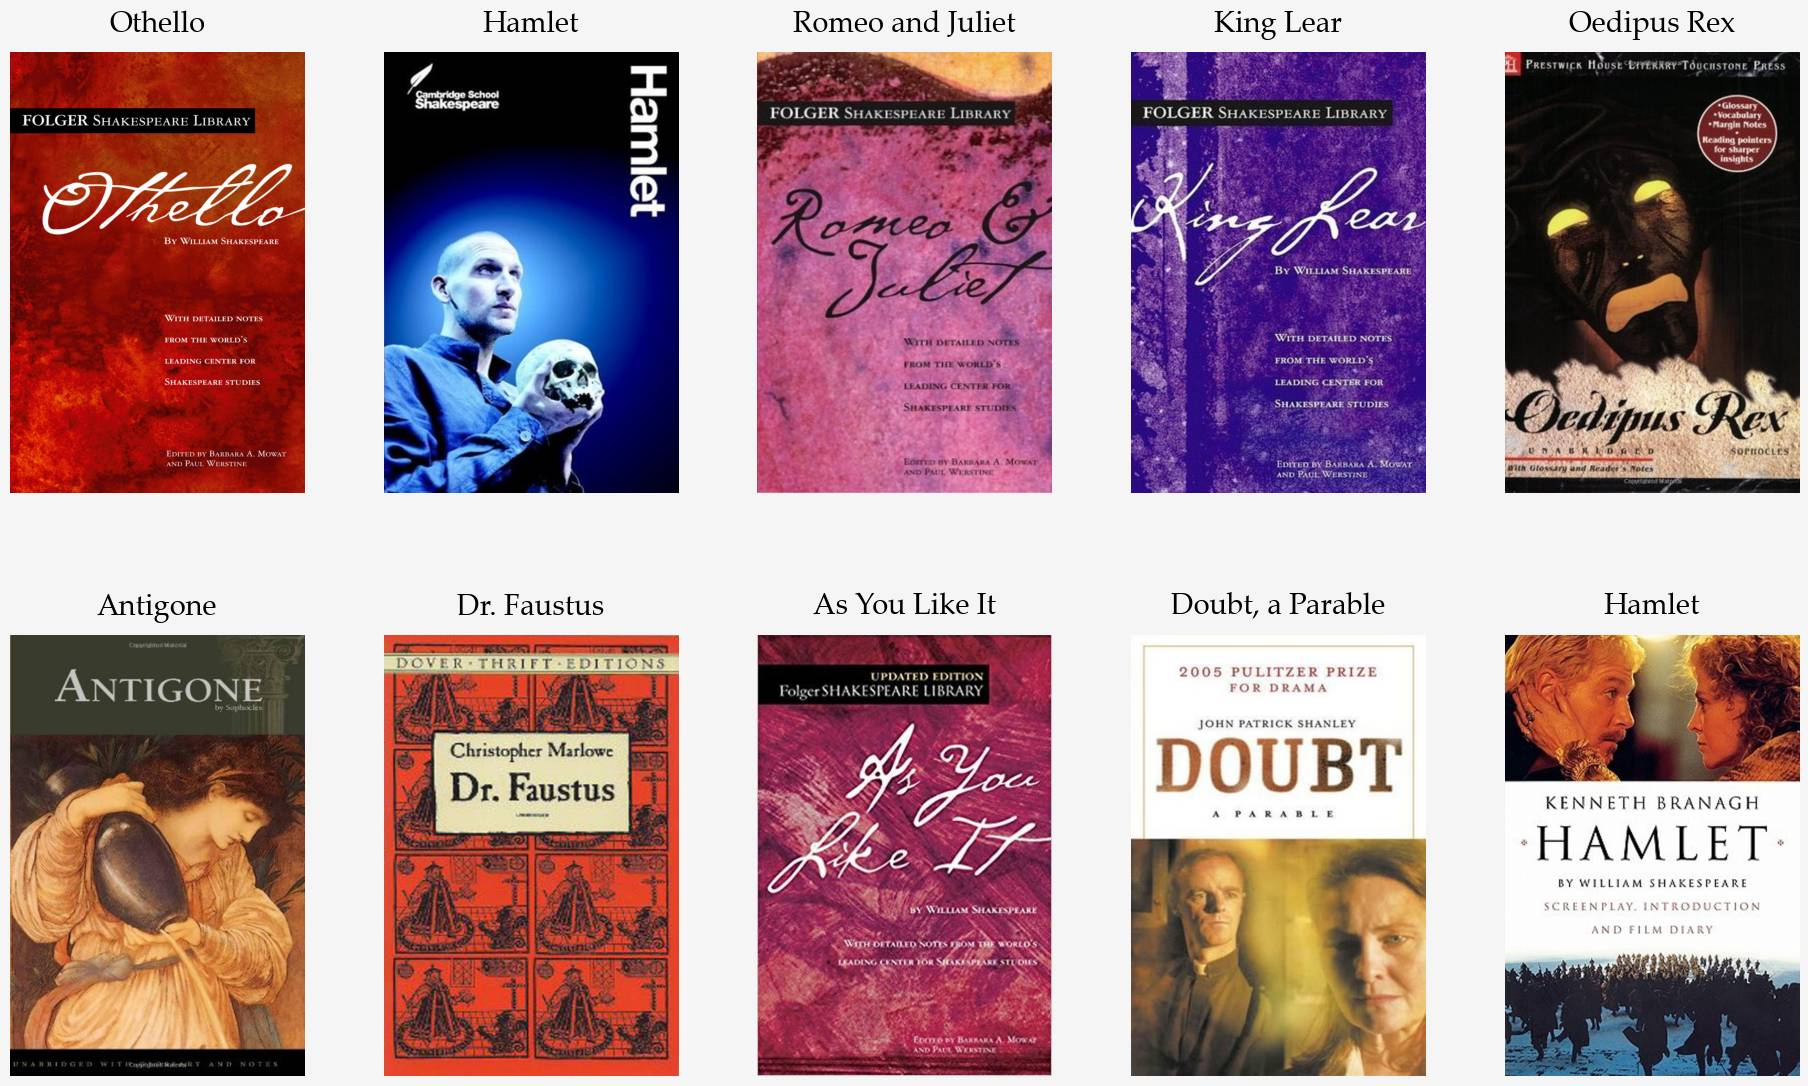

In [ ]:
#Get 10 book recommendations for 'Macbeth' (by Shakespeare)
book_title = 'Macbeth'
Get_Recommendations(book_title, overall_similarity_mtrx, genre_sim_mtrx, alpha=0.7, top_n=10)


<br><br>

**Generating Book Recommendations from Random Titles**


Recommendations for 'The Soulforge' (by Margaret Weis):


Recommendation    Genre
1   The Icewind Dale Trilogy Collector's Edition (by R.A. Salvatore)  Fantasy
2                              The Crystal Shard (by R.A. Salvatore)  Fantasy
3                                War of the Twins (by Margaret Weis)  Fantasy
4                      Dragons of Autumn Twilight (by Margaret Weis)  Fantasy
5                         Dragons of Winter Night (by Margaret Weis)  Fantasy
6                       Dragons of Spring Dawning (by Margaret Weis)  Fantasy
7                          Dragonlance Chronicles (by Margaret Weis)  Fantasy
8                The Darkness That Comes Before (by R. Scott Bakker)  Fantasy
9                             Into the Fire (by Dennis L. McKiernan)  Fantasy
10                                      Homeland (by R.A. Salvatore)  Fantasy

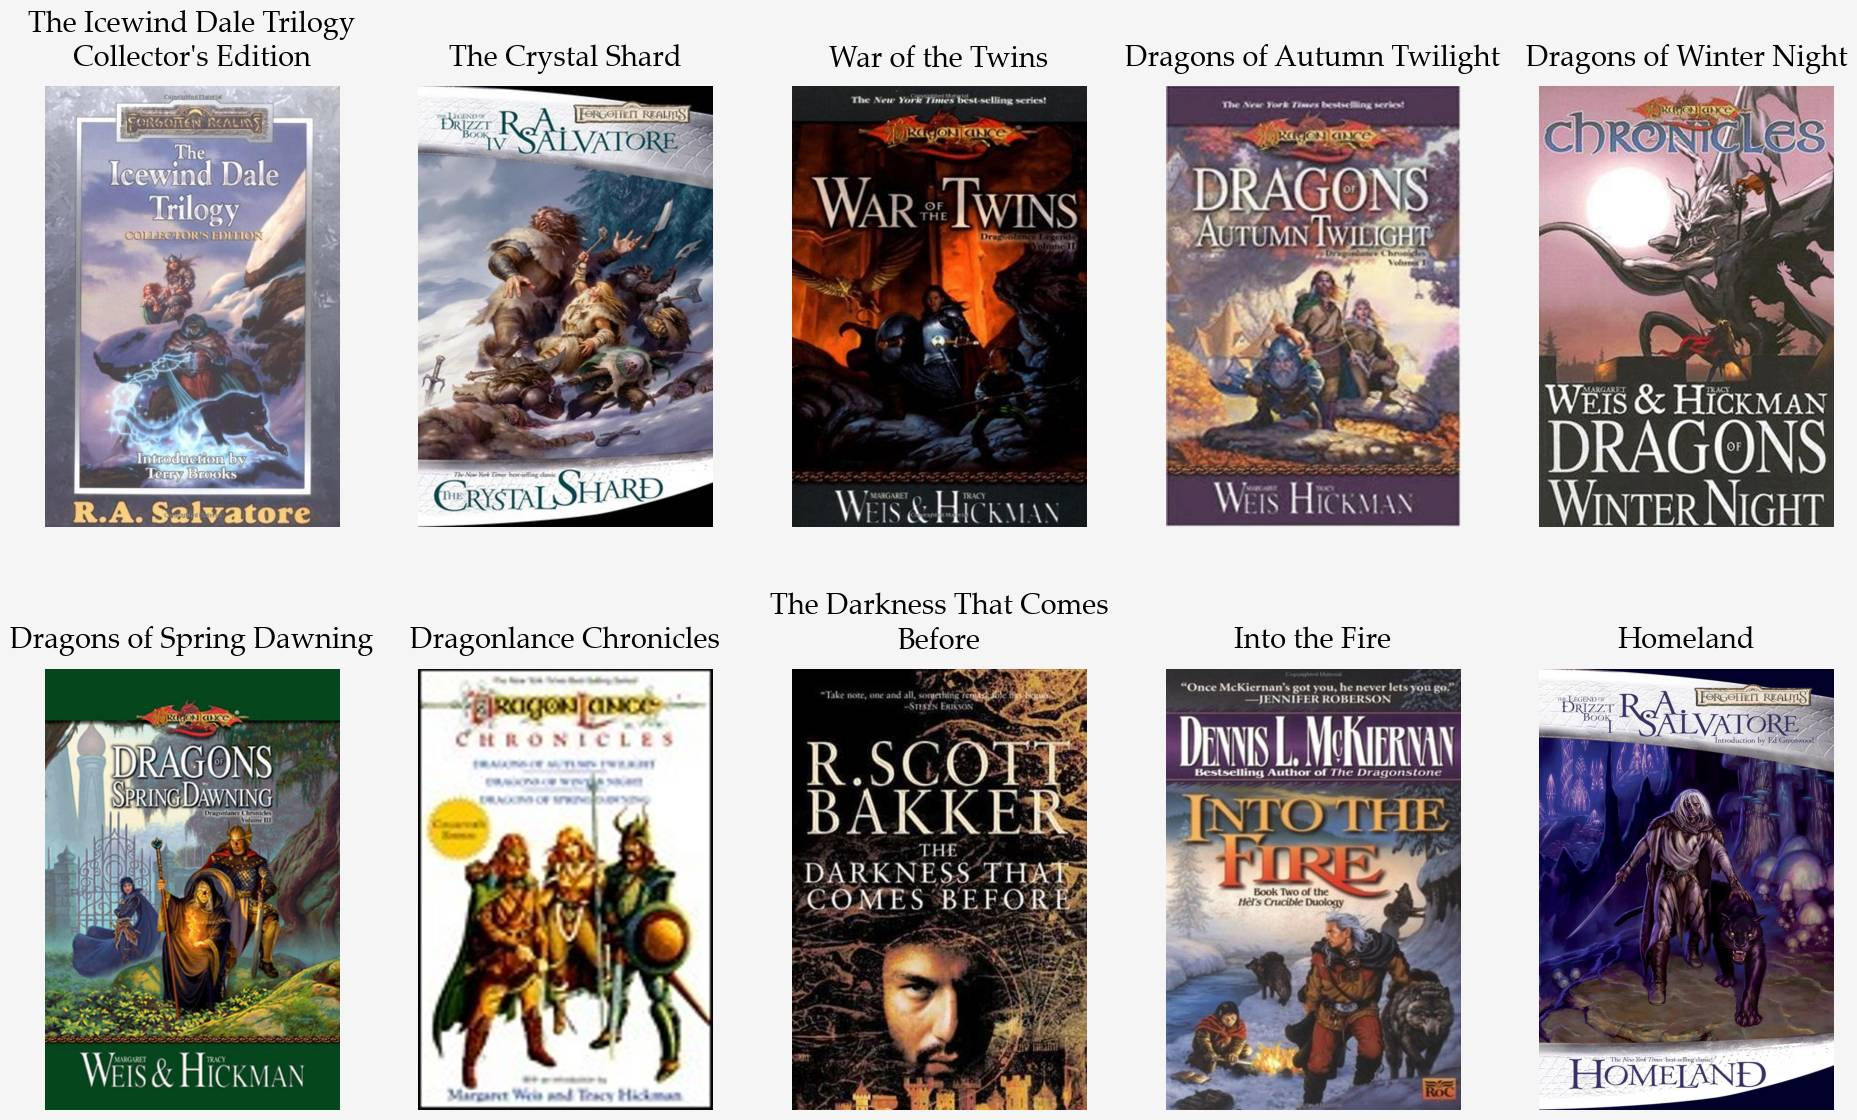


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'The Living Dead' (by John Joseph Adams):


Recommendation  \
1                               Trigger Warning: Short Fictions and Disturbances (by Neil Gaiman)   
2                                     Fragile Things: Short Fictions and Wonders (by Neil Gaiman)   
3                                 Smoke and Mirrors: Short Fiction and Illusions (by Neil Gaiman)   
4                   Maps in a Mirror: The Short Fiction of Orson Scott Card (by Orson Scott Card)   
5                                                          Stranger Things Happen (by Kelly Link)   
6                                  Dreamsongs: A RRetrospective: Book One (by George R.R. Martin)   
7                                                           Dangerous Visions (by Harlan Ellison)   
8                                                    Again, Dangerous Visions (by Harlan Ellison)   
9                                                   Shadows Over Baker Street (by Michael Reaves)   
10  The Best of H.P. Lovecraft: Bloodcurdling Tales of Horror and the Macabre (by H.P. Lovecraft)   

              Genre  
1           Fantasy  
2           Fantasy  
3           Fantasy  
4   Science Fiction  
5     Short Stories  
6           Fantasy  
7   Science Fiction  
8   Science Fiction  
9            Horror  
10           Horror

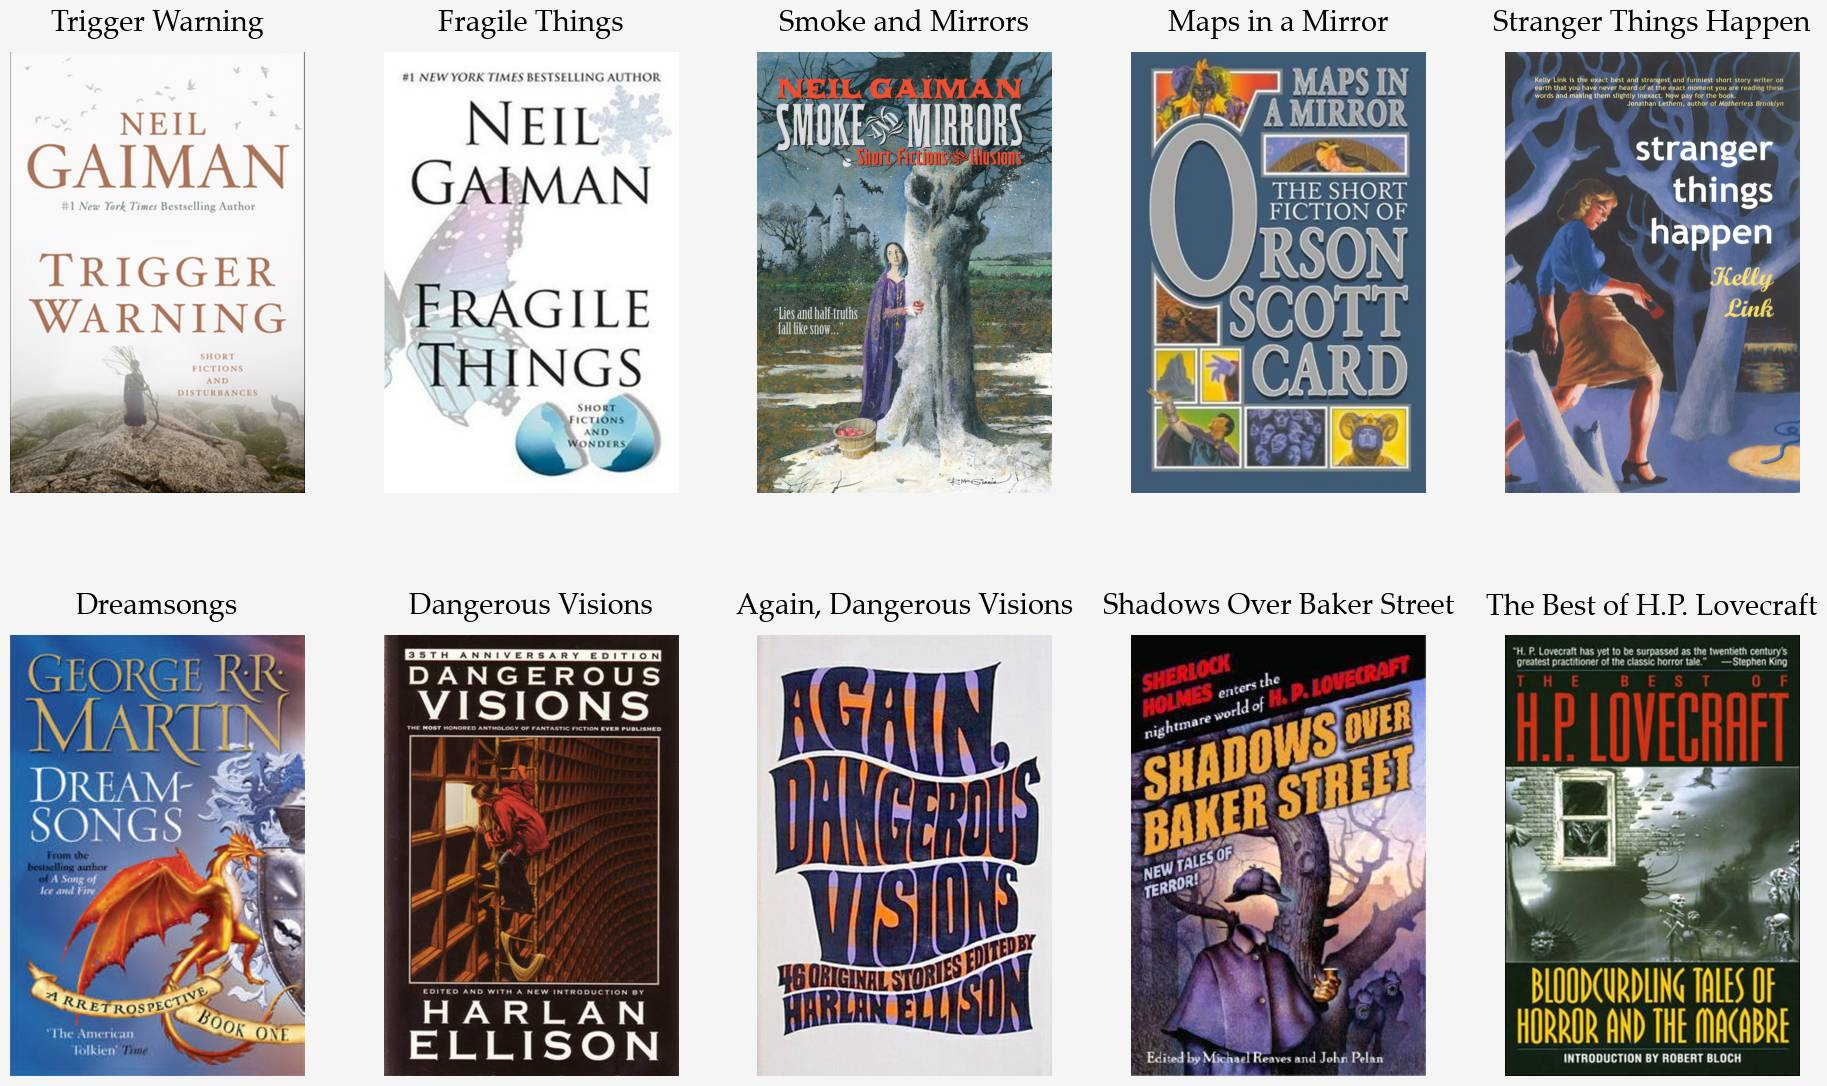


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Caim' (by José Saramago):


Recommendation          Genre
1                           Mar Morto (by Jorge Amado)        Fiction
2                 A Crónica de Travnik (by Ivo Andrić)        Fiction
3                         Os Maias (by Eça de Queirós)       Classics
4     A Fórmula de Deus (by José Rodrigues dos Santos)        Fiction
5                    Vidas secas (by Graciliano Ramos)       Classics
6                             Maktub (by Paulo Coelho)        Fiction
7                   Capitães da Areia (by Jorge Amado)       Classics
8   Contos de Aprendiz (by Carlos Drummond de Andrade)  Short Stories
9           A Reforma da Natureza (by Monteiro Lobato)      Childrens
10                       The Waves (by Virginia Woolf)       Classics

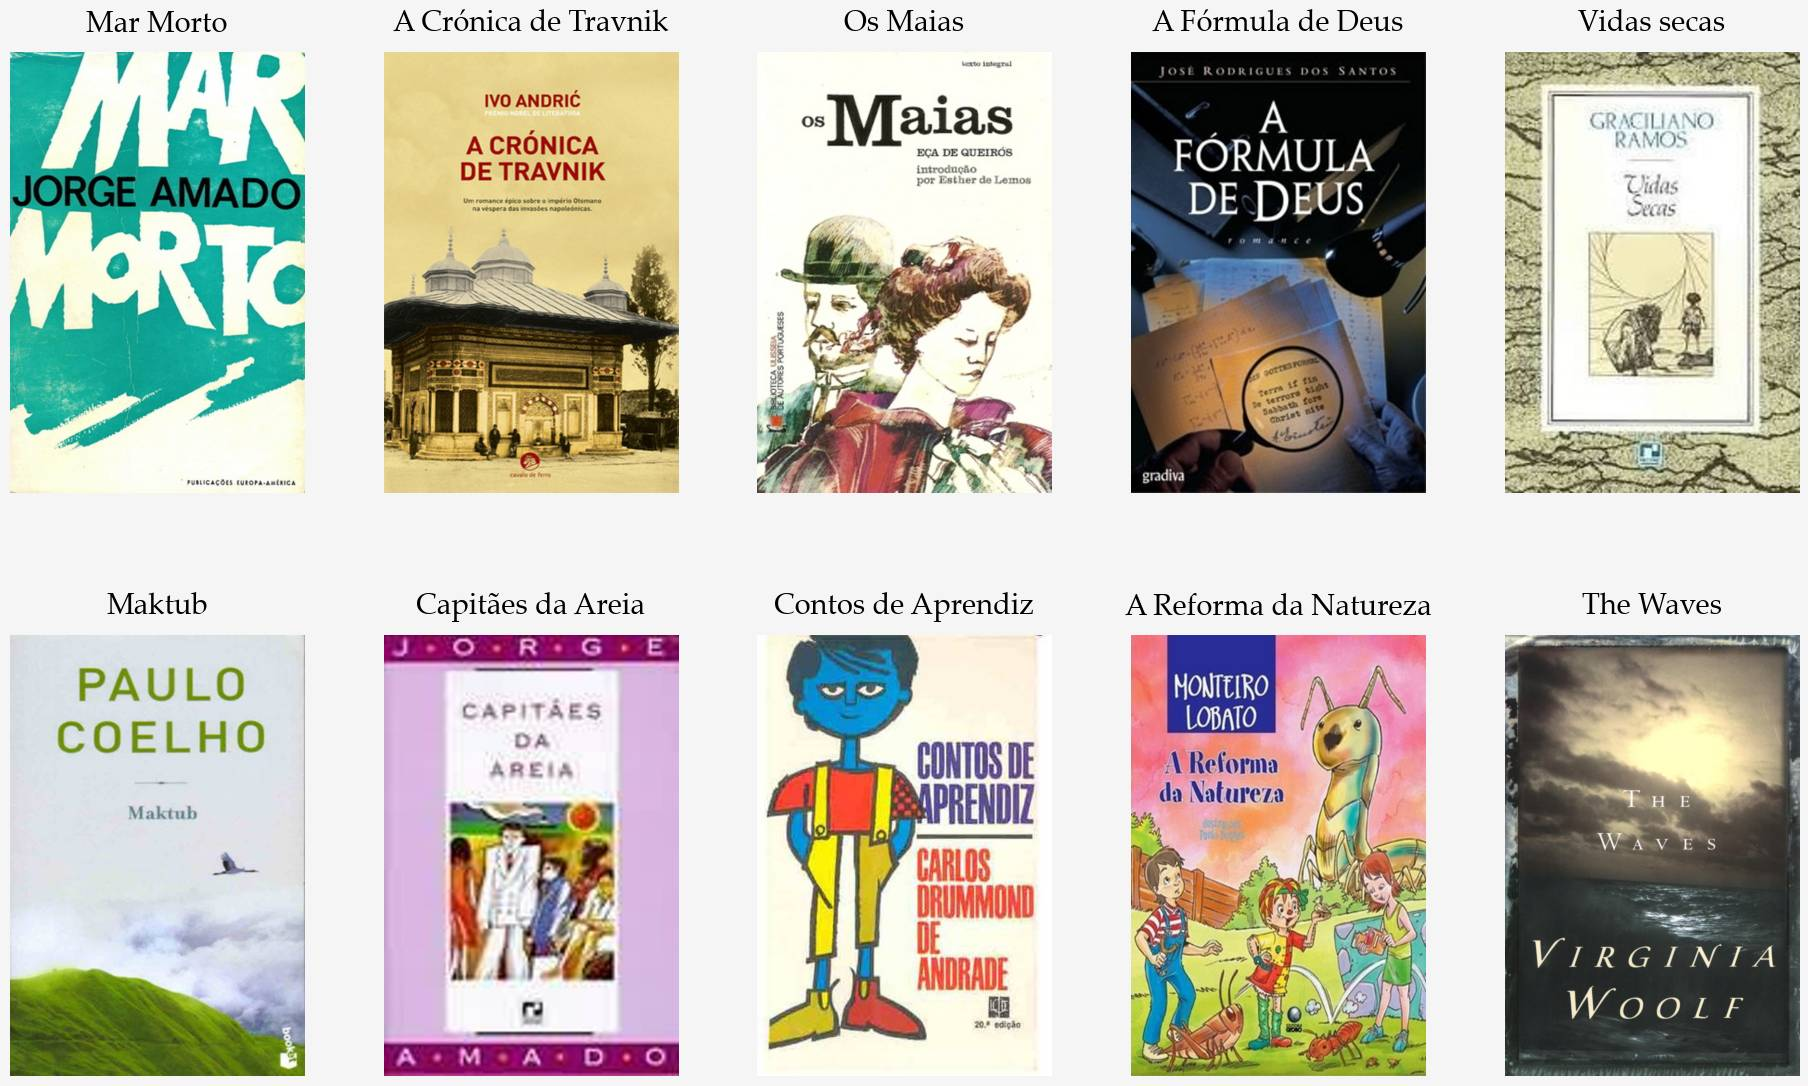


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'The Robe' (by Lloyd C. Douglas):


Recommendation               Genre
1        Ben-Hur: A Tale of the Christ (by Lew Wallace)            Classics
2                           Out of Egypt (by Anne Rice)             Fiction
3                       Christy (by Catherine Marshall)  Historical Fiction
4   The Lilies of the Field (by William Edmund Barrett)             Fiction
5                        Godric (by Frederick Buechner)             Fiction
6                     Elsie Dinsmore (by Martha Finley)            Classics
7         Mark of the Lion Trilogy (by Francine Rivers)   Christian Fiction
8              A Voice in the Wind (by Francine Rivers)   Christian Fiction
9          An Echo in the Darkness (by Francine Rivers)   Christian Fiction
10                Jerusalem Interlude (by Bodie Thoene)  Historical Fiction

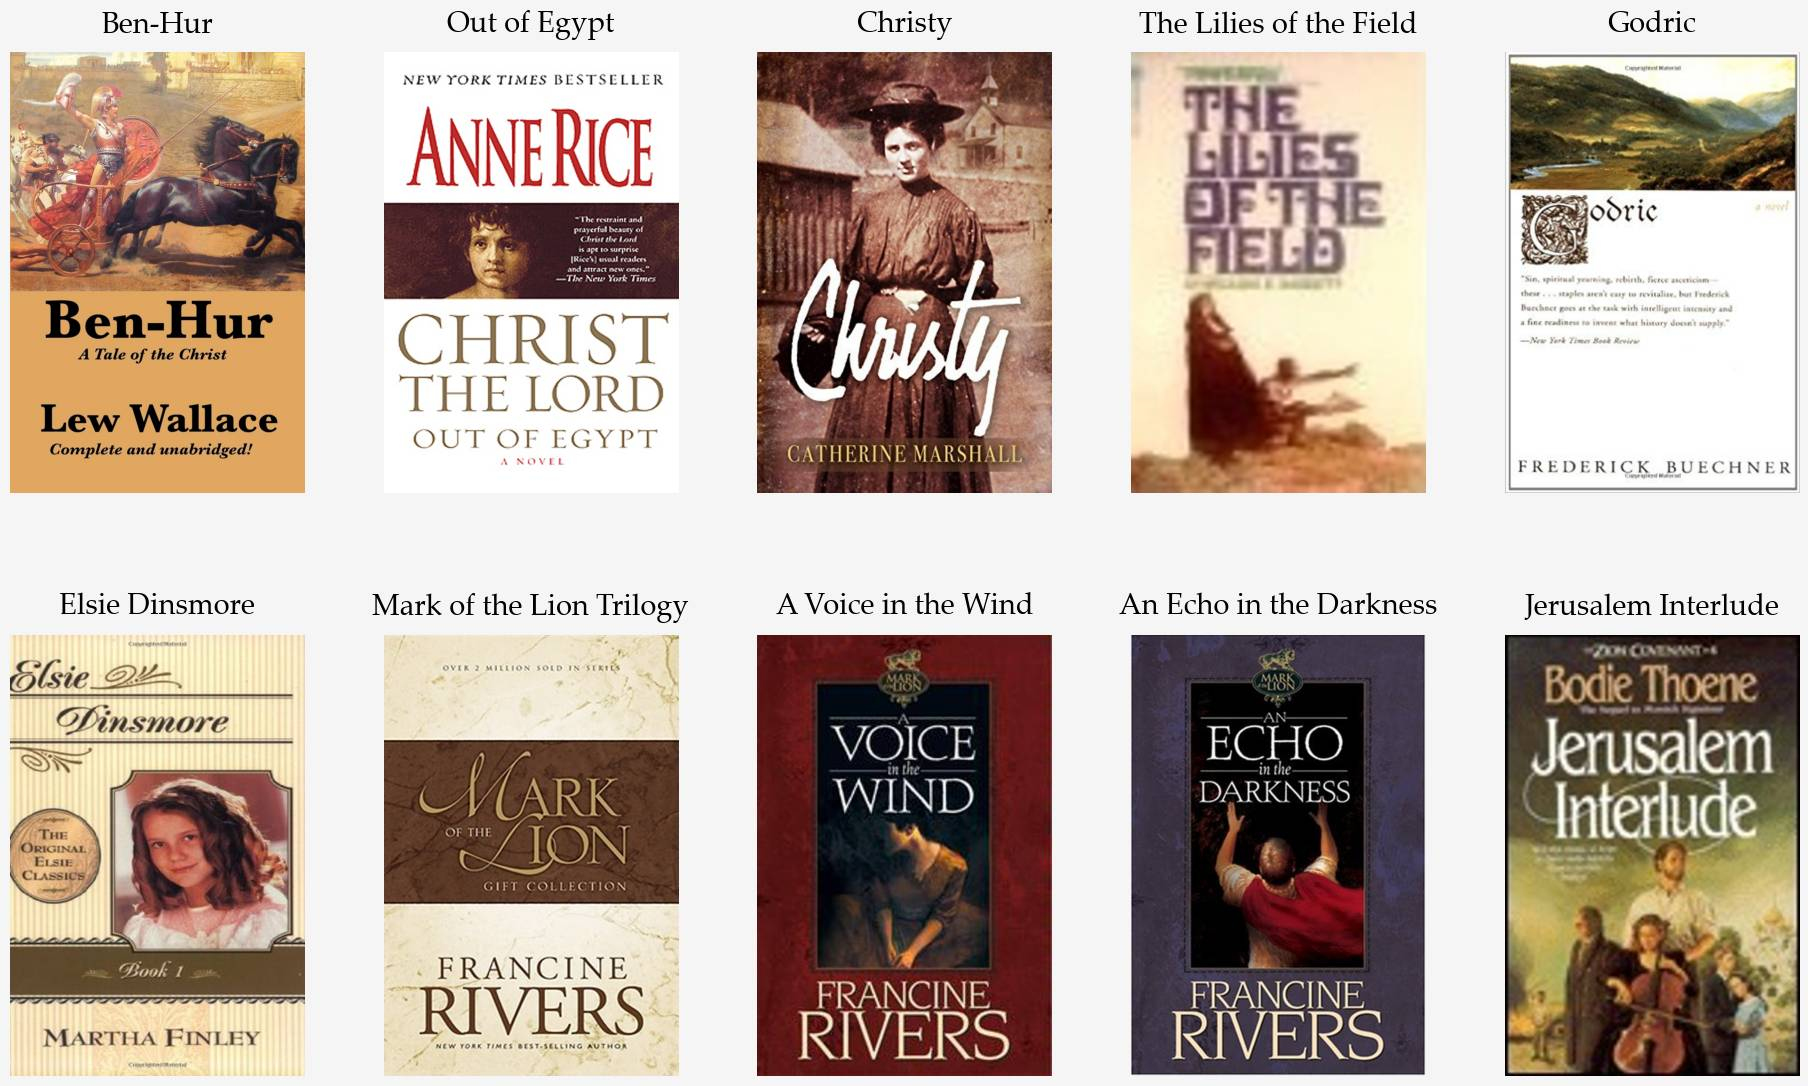


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'The Bear Nobody Wanted' (by Janet Ahlberg):


Recommendation  \
1   Walt Disney Pictures Presents: The Prince and the Pauper (by Fran Manushkin)   
2                                  Scooby-doo On Zombie Island (by Gail  Herman)   
3                                   Honey Paw and Lightfoot (by Jonathan London)   
4                                               Beyond the Ridge (by Paul Goble)   
5                                                 Easter Bunny (by Roger Priddy)   
6                                        Tooth-Gnasher Superflash (by Pinkwater)   
7                            Holly Jolly: Campfire Stories (by JK Franko Junior)   
8                                Dragons Don't Dance Ballet (by Jennifer Carson)   
9                                            The Snuggle Bunny (by Nancy Jewell)   
10             O is for Oregon: Written by Kids for Kids (by Winterhaven School)   

            Genre  
1       Childrens  
2       Childrens  
3   Picture Books  
4   Picture Books  
5       Childrens  
6   Picture Books  
7       Childrens  
8       Childrens  
9   Picture Books  
10      Childrens

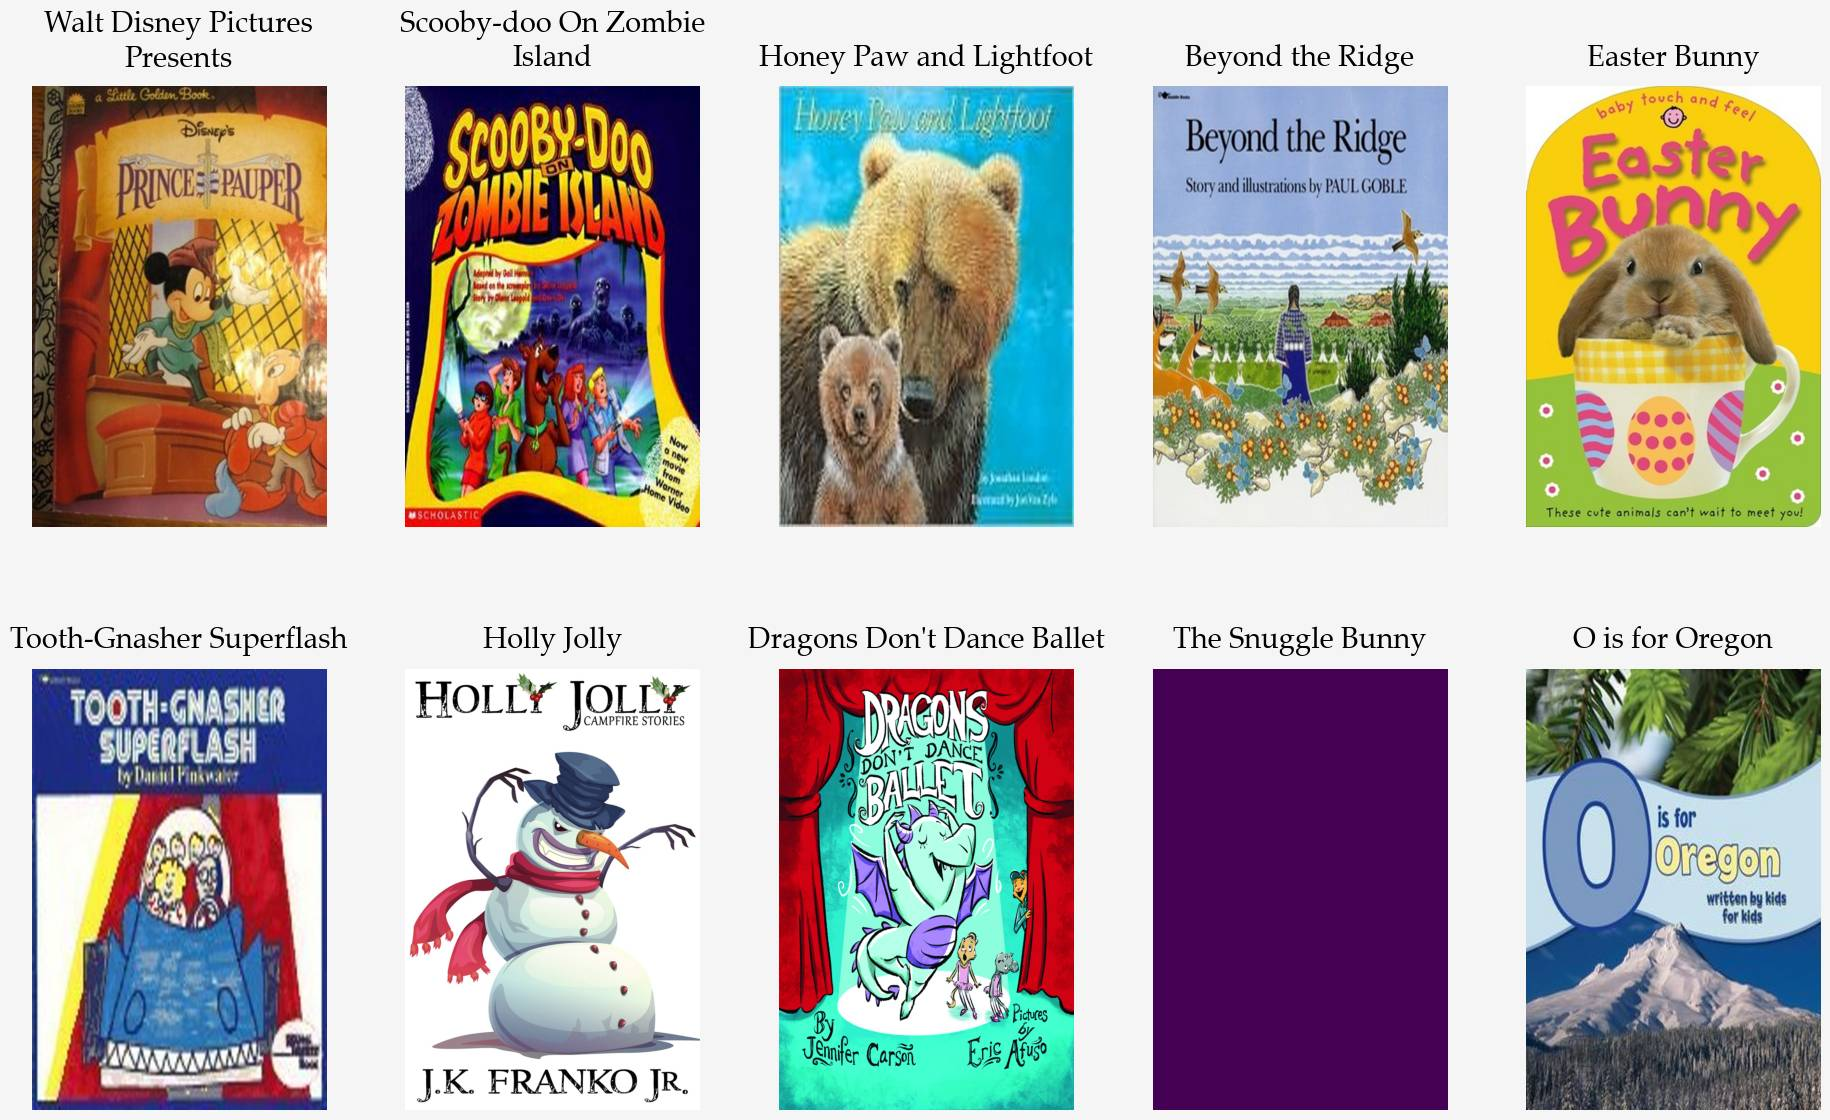


 ______________________________________________________________________________________________________________________________________________________



In [66]:
#Get recommendations for titles chosen at random
random_titles = df.sample(5)[['book_title','author']]

#get recommendations for the selected titles
for title,author in zip(random_titles.iloc[:,0],random_titles.iloc[:,1]):
    Get_Recommendations(title, overall_similarity_mtrx, genre_sim_mtrx, alpha=0.7, top_n=10)
    print('\n', 150*'_' + '\n')


<br><br>

**Generating Book Recommendations from User Input (titles only)**

In [67]:
#Defining custom function that requests a book title from the user and returns relevant book recommendations
def Get_Recommendations_fromUser(top_n=10):
    while True:
        book_title = input('\nEnter book title: ')     
        recommendations = Get_Recommendations(book_title, overall_similarity_mtrx, genre_sim_mtrx, alpha=0.7, top_n=top_n)
        print('\n', 150*'_' + '\n', flush=True)
        if recommendations is not False:
            response = str(input('\n\nWould you like to get recommendations for more books? [Yes/no]\n')).lower().strip()
            if response in ['yes', 'y']: 
                continue 
            elif response in ['no', 'n']:
                print('\nThank you for trying the recommender.\nExiting...')
                break
            else: 
                print('\nResponse invalid.\nProcess terminating...')
                break


*Testing the function*


Recommendations for 'The Great Gatsby' (by F. Scott Fitzgerald):


Recommendation     Genre
1                     This Side of Paradise (by F. Scott Fitzgerald)  Classics
2                                     Ethan Frome (by Edith Wharton)  Classics
3   Pride and Prejudice, Mansfield Park, Persuasion (by Jane Austen)  Classics
4                                Of Mice and Men (by John Steinbeck)   Fiction
5                               Heart of Darkness (by Joseph Conrad)   Fiction
6                                     The Jungle (by Upton Sinclair)  Classics
7                        The Death of the Heart (by Elizabeth Bowen)  Classics
8                             The Wings of the Dove (by Henry James)  Classics
9                                       Old School (by Tobias Wolff)   Fiction
10                          Cry, the Beloved Country (by Alan Paton)   Fiction

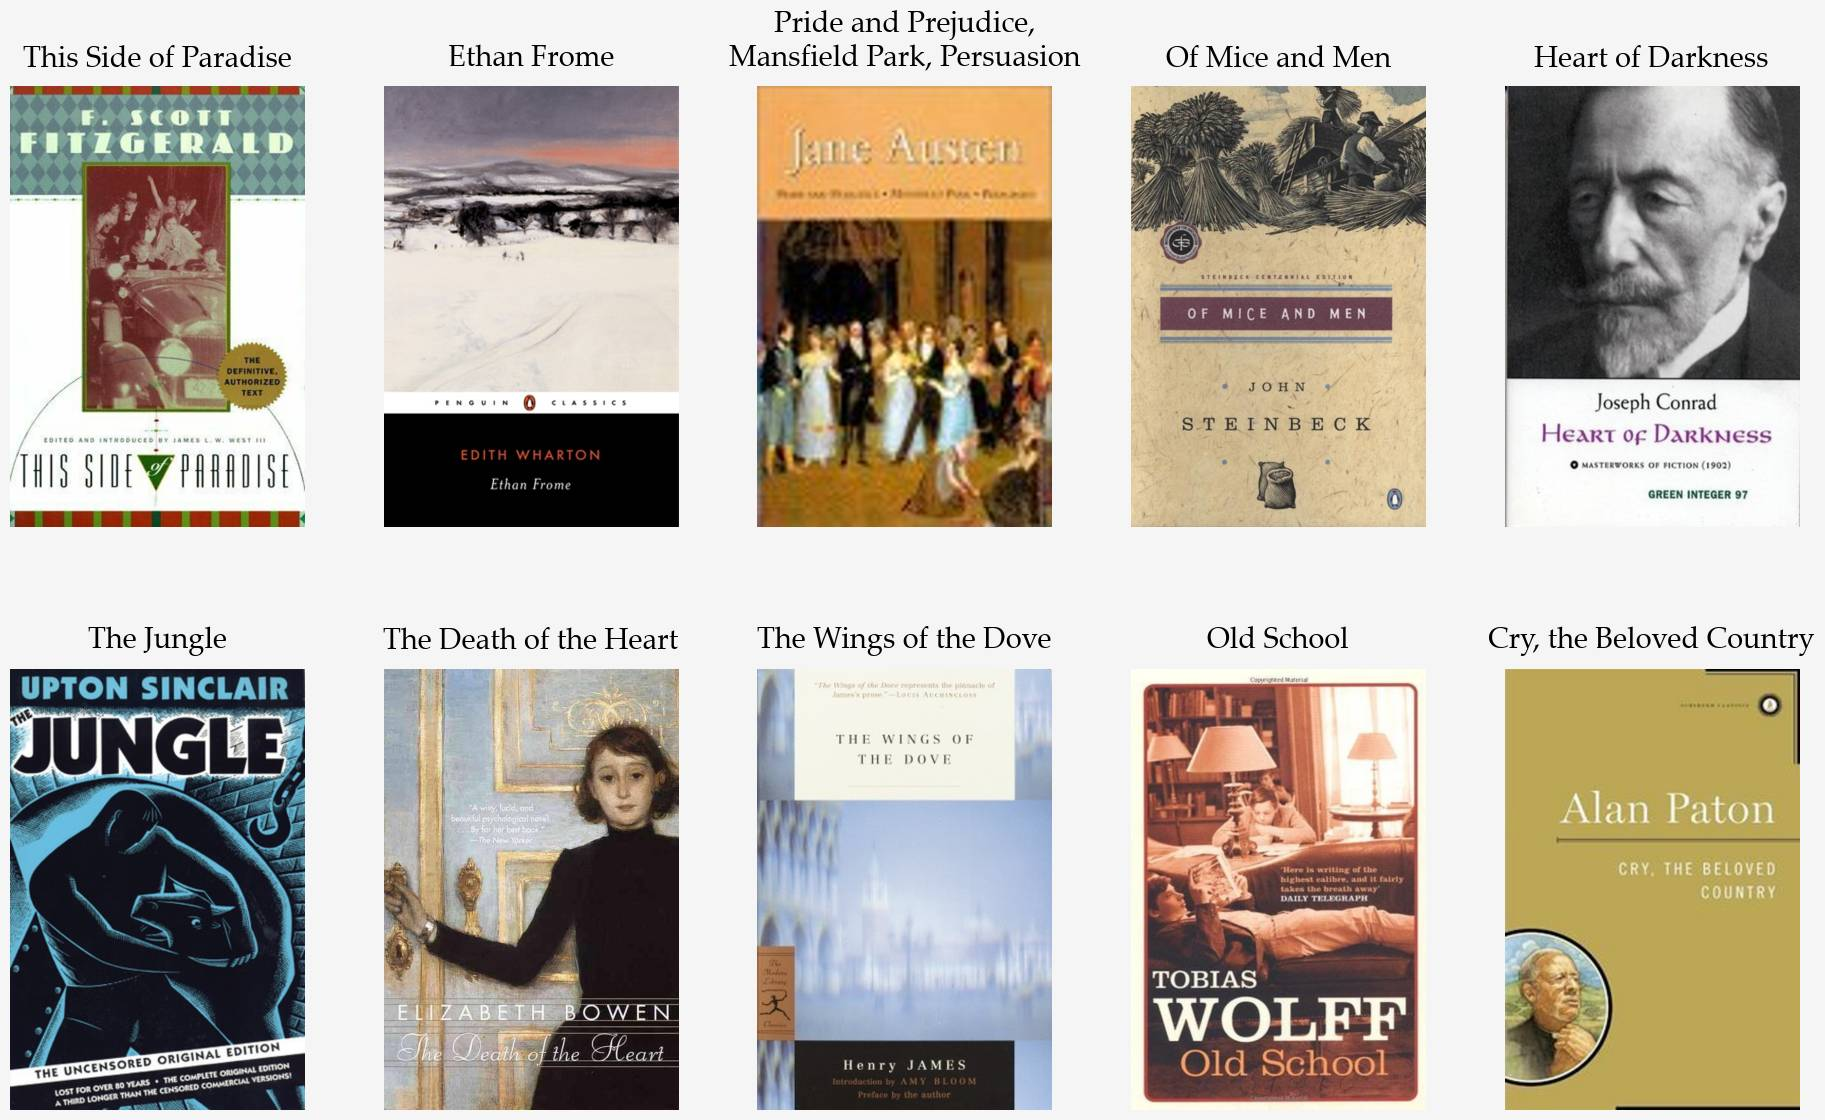


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Return Of The King' (by J.R.R. Tolkien):


Recommendation  \
1                                                          The Two Towers (by J.R.R. Tolkien)   
2                                                               New Spring (by Robert Jordan)   
3                                                        The Dragon Reborn (by Robert Jordan)   
4                                                           The Great Hunt (by Robert Jordan)   
5                                                     The Eye of the World (by Robert Jordan)   
6                                                                     Orcs (by Stan Nicholls)   
7                                                        The Shadow Rising (by Robert Jordan)   
8   J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings (by J.R.R. Tolkien)   
9                                             The Tower of the Swallow (by Andrzej Sapkowski)   
10                                                Before They Are Hanged (by Joe Abercrombie)   

      Genre  
1   Fantasy  
2   Fantasy  
3   Fantasy  
4   Fantasy  
5   Fantasy  
6   Fantasy  
7   Fantasy  
8   Fantasy  
9   Fantasy  
10  Fantasy

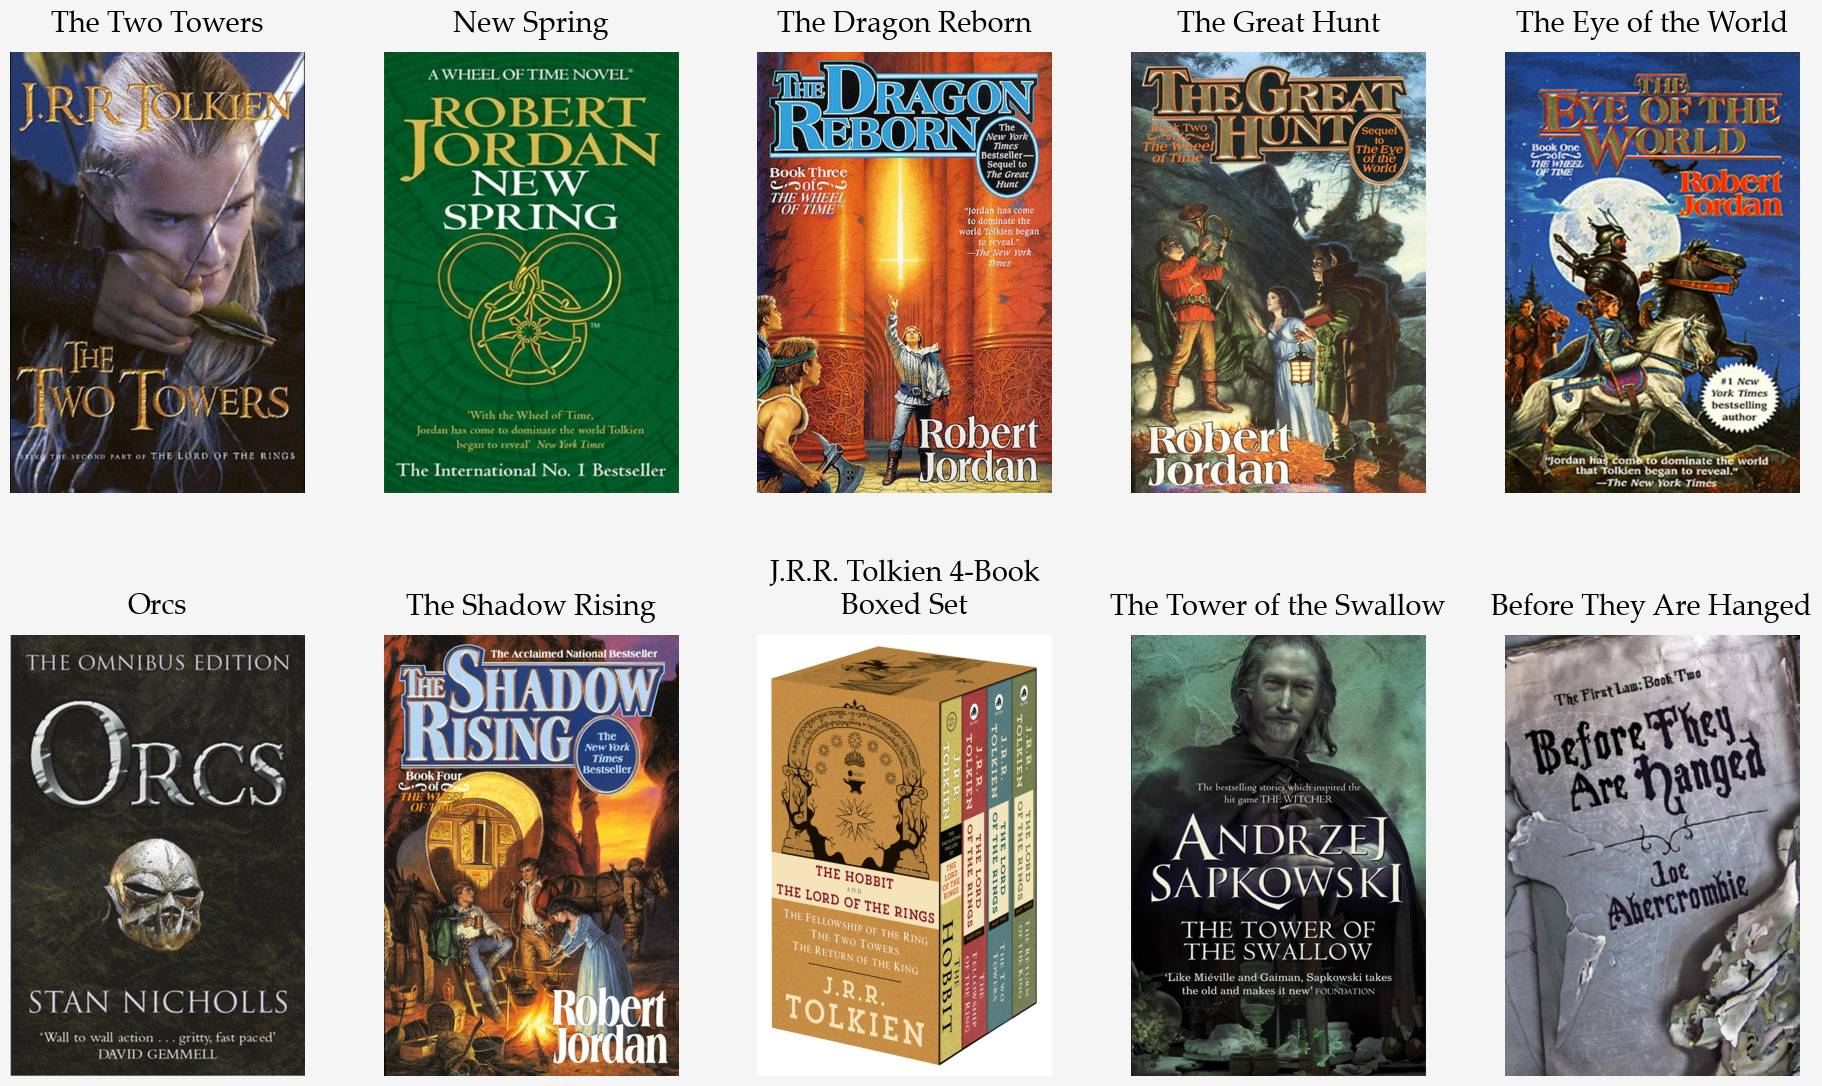


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Atomic Habit' (by James Clear):


Recommendation  \
1                         Eat That Frog! 21 Great Ways to Stop Procrastinating and Get More Done in Less Time (by Brian Tracy)   
2                                                  Deep Work: Rules for Focused Success in a Distracted World (by Cal Newport)   
3                                            The Power of Habit: Why We Do What We Do in Life and Business (by Charles Duhigg)   
4                                                Digital Minimalism: Choosing a Focused Life in a Noisy World (by Cal Newport)   
5                                                             Originals: How Non-Conformists Move the World (by Adam M. Grant)   
6                                                 Getting Things Done: The Art of Stress-Free Productivity (by David    Allen)   
7                                                                                 Thinking, Fast and Slow (by Daniel Kahneman)   
8   Building a Second Brain: A Proven Method to Organize Your Digital Life and Unlock Your Creative Potential (by Tiago Forte)   
9                      So Good They Can't Ignore You: Why Skills Trump Passion in the Quest for Work You Love (by Cal Newport)   
10                                                       Four Thousand Weeks: Time Management for Mortals (by Oliver Burkeman)   

           Genre  
1      Self Help  
2     Nonfiction  
3     Nonfiction  
4     Nonfiction  
5     Nonfiction  
6     Nonfiction  
7     Nonfiction  
8   Productivity  
9     Nonfiction  
10    Nonfiction

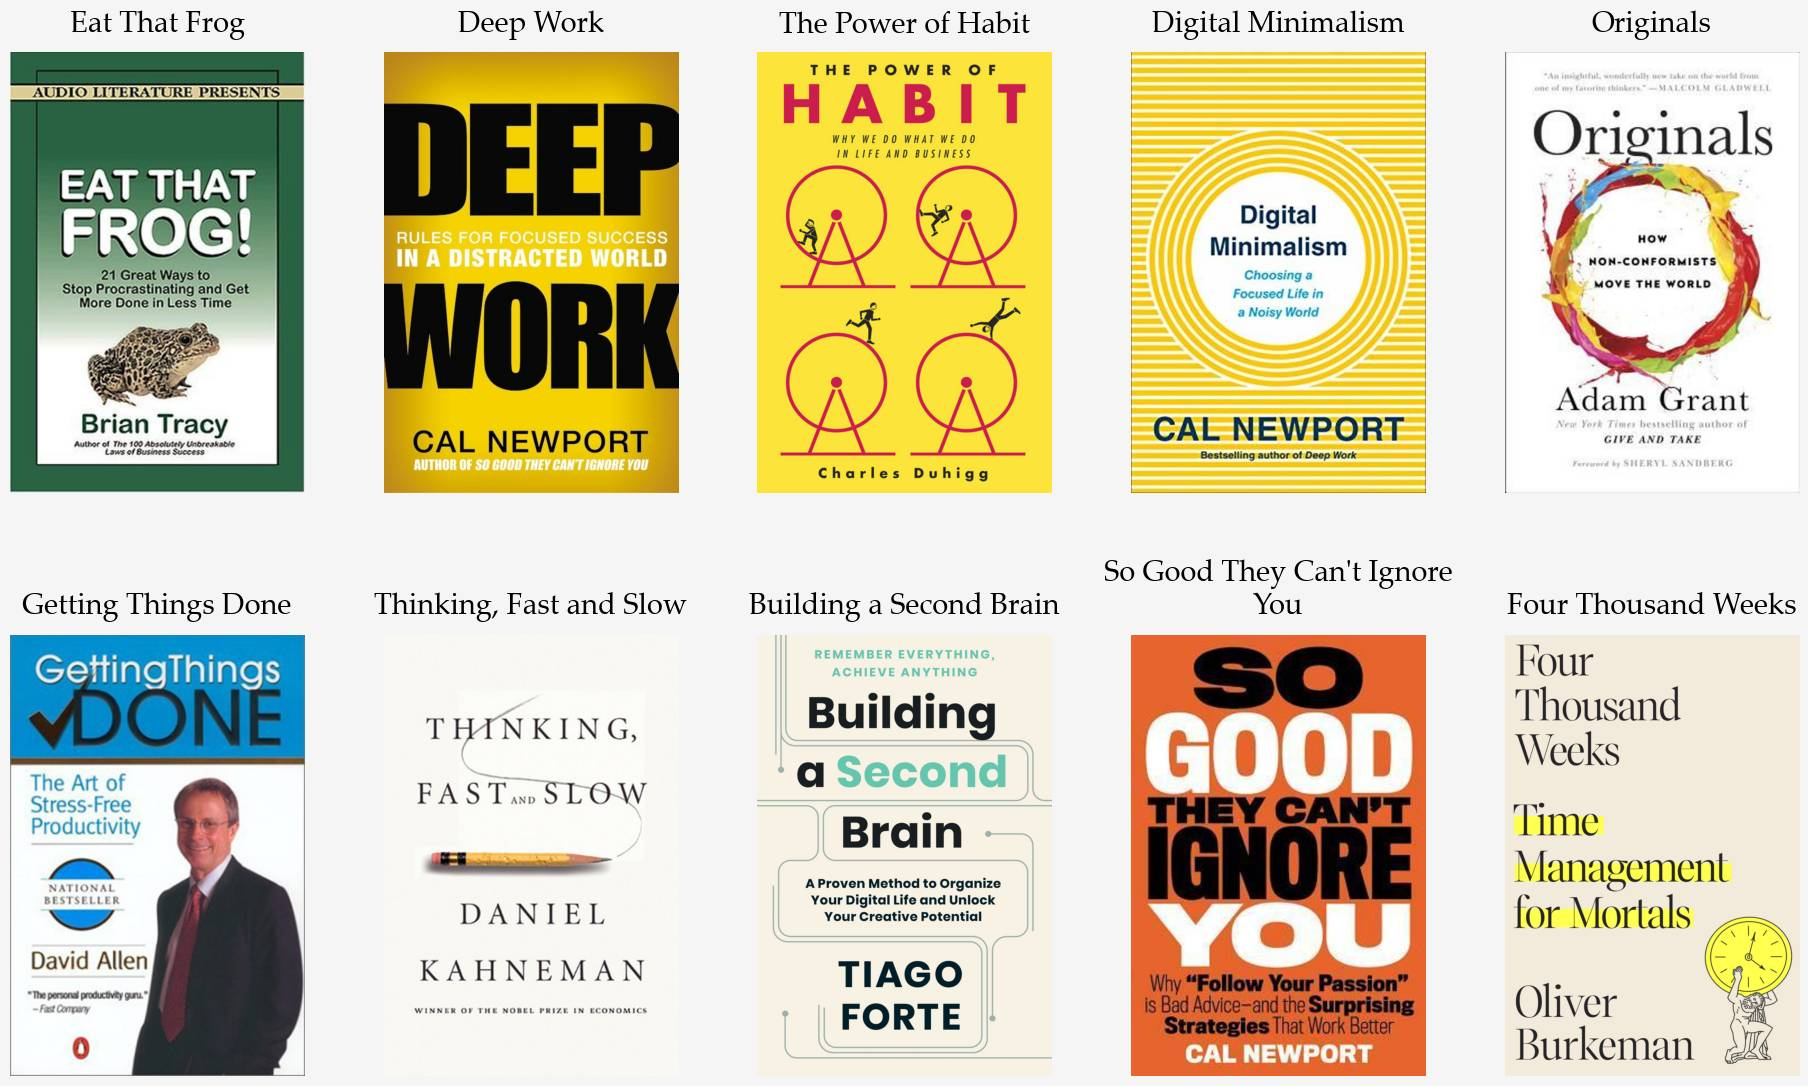


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'A Brief History Of Time' (by Stephen Hawking):


Recommendation  \
1                                                                   A Briefer History of Time (by Stephen Hawking)   
2                                        Black Holes & Time Warps: Einstein's Outrageous Legacy (by Kip S. Thorne)   
3                                                                               Wrinkles in Time (by George Smoot)   
4    Parallel Worlds: A Journey through Creation, Higher Dimensions, and the Future of the Cosmos (by Michio Kaku)   
5                                                                            The Grand Design (by Stephen Hawking)   
6                   Billions & Billions: Thoughts on Life and Death at the Brink of the Millennium (by Carl Sagan)   
7                                                      Astrophysics for People in a Hurry (by Neil deGrasse Tyson)   
8                                                      The Structure of Scientific Revolutions (by Thomas S. Kuhn)   
9                                             Pale Blue Dot: A Vision of the Human Future in Space (by Carl Sagan)   
10  The Elegant Universe: Superstrings, Hidden Dimensions, and the Quest for the Ultimate Theory (by Brian Greene)   

      Genre  
1   Science  
2   Science  
3   Science  
4   Science  
5   Science  
6   Science  
7   Science  
8   Science  
9   Science  
10  Science

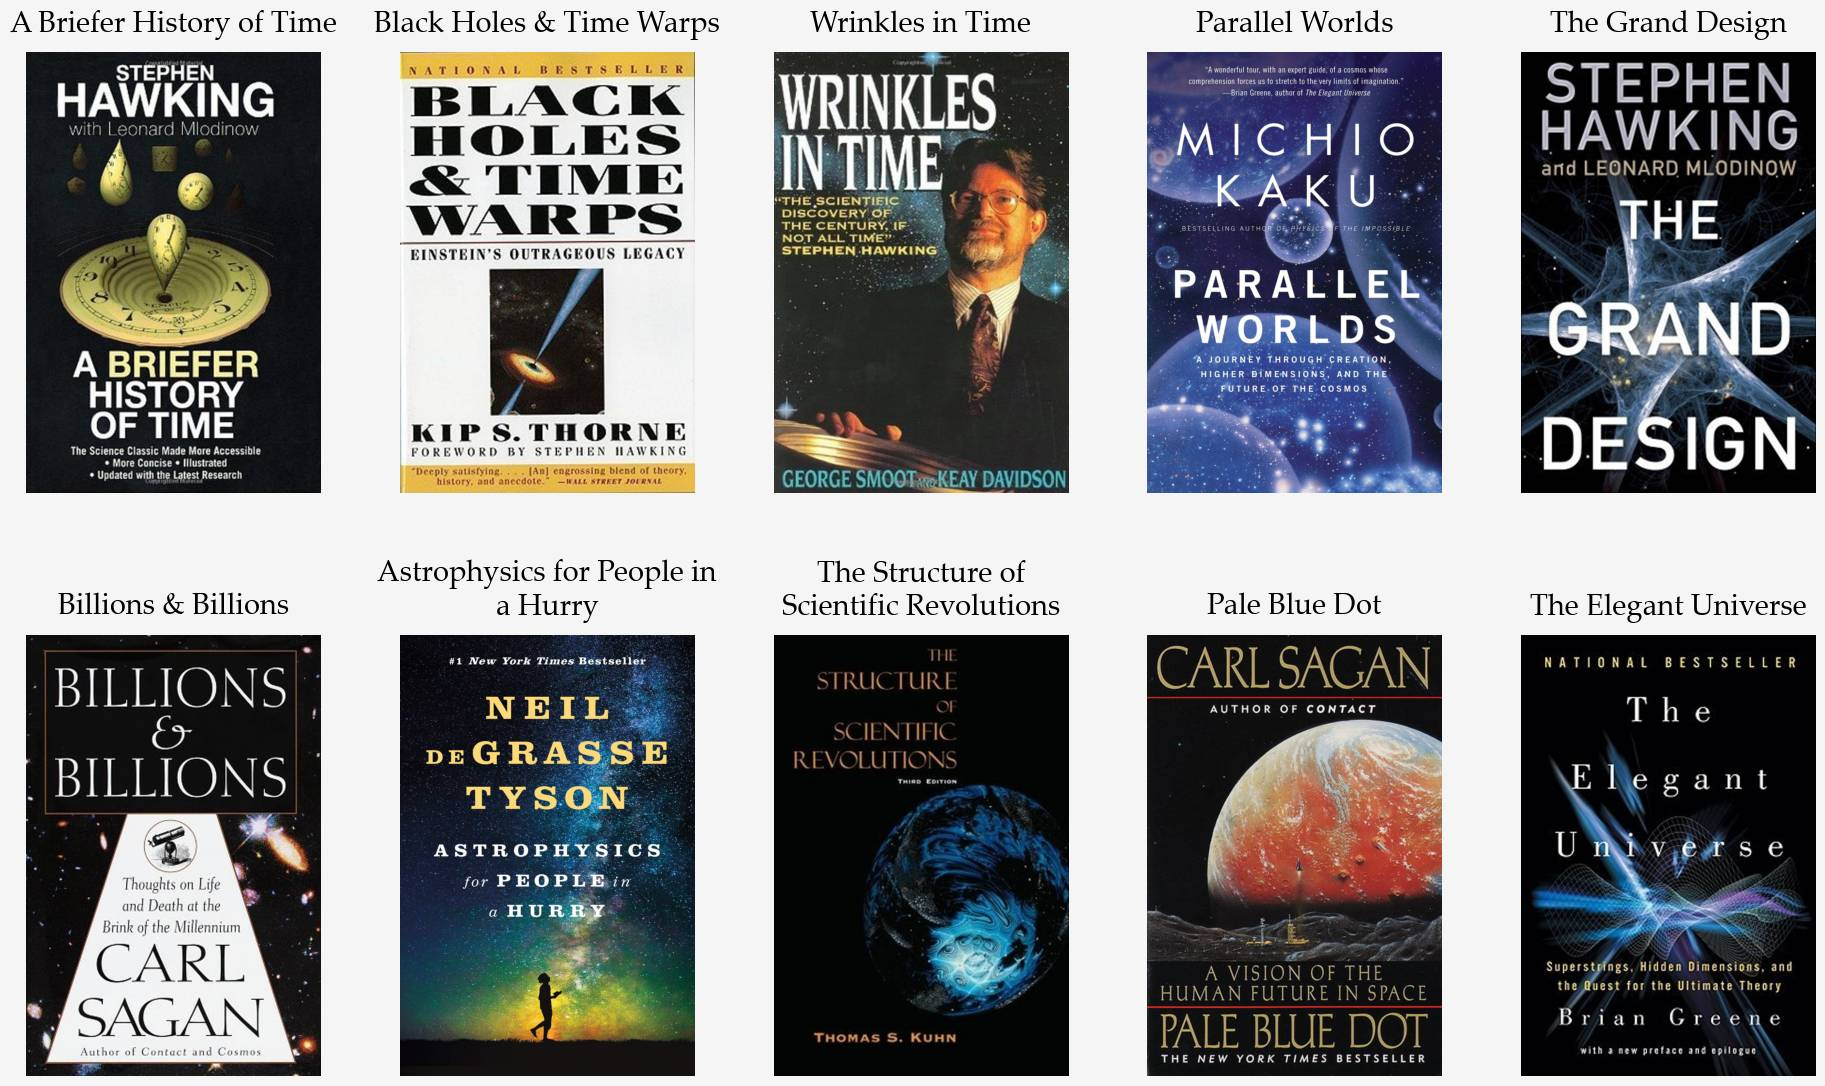


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Critique Of Pure Reason' (by Immanuel Kant):


Recommendation  \
1                                         Phenomenology of Spirit (by Georg Wilhelm Friedrich Hegel)   
2                                                               Being and Time (by Martin Heidegger)   
3                                         Groundwork of the Metaphysics of Morals (by Immanuel Kant)   
4               Beyond Good and Evil: Prelude to a Philosophy of the Future (by Friedrich Nietzsche)   
5                                                    Thus Spoke Zarathustra (by Friedrich Nietzsche)   
6                                                      Beyond Good and Evil (by Friedrich Nietzsche)   
7                                                           The Anti-Christ (by Friedrich Nietzsche)   
8   Why I Am Not a Christian and Other Essays on Religion and Related Subjects (by Bertrand Russell)   
9                                                    The Interpretation of Dreams (by Sigmund Freud)   
10                The Open Society and Its Enemies - Volume One: The Spell of Plato (by Karl Popper)   

         Genre  
1   Philosophy  
2   Philosophy  
3   Philosophy  
4   Philosophy  
5   Philosophy  
6   Philosophy  
7   Philosophy  
8   Philosophy  
9   Psychology  
10  Philosophy

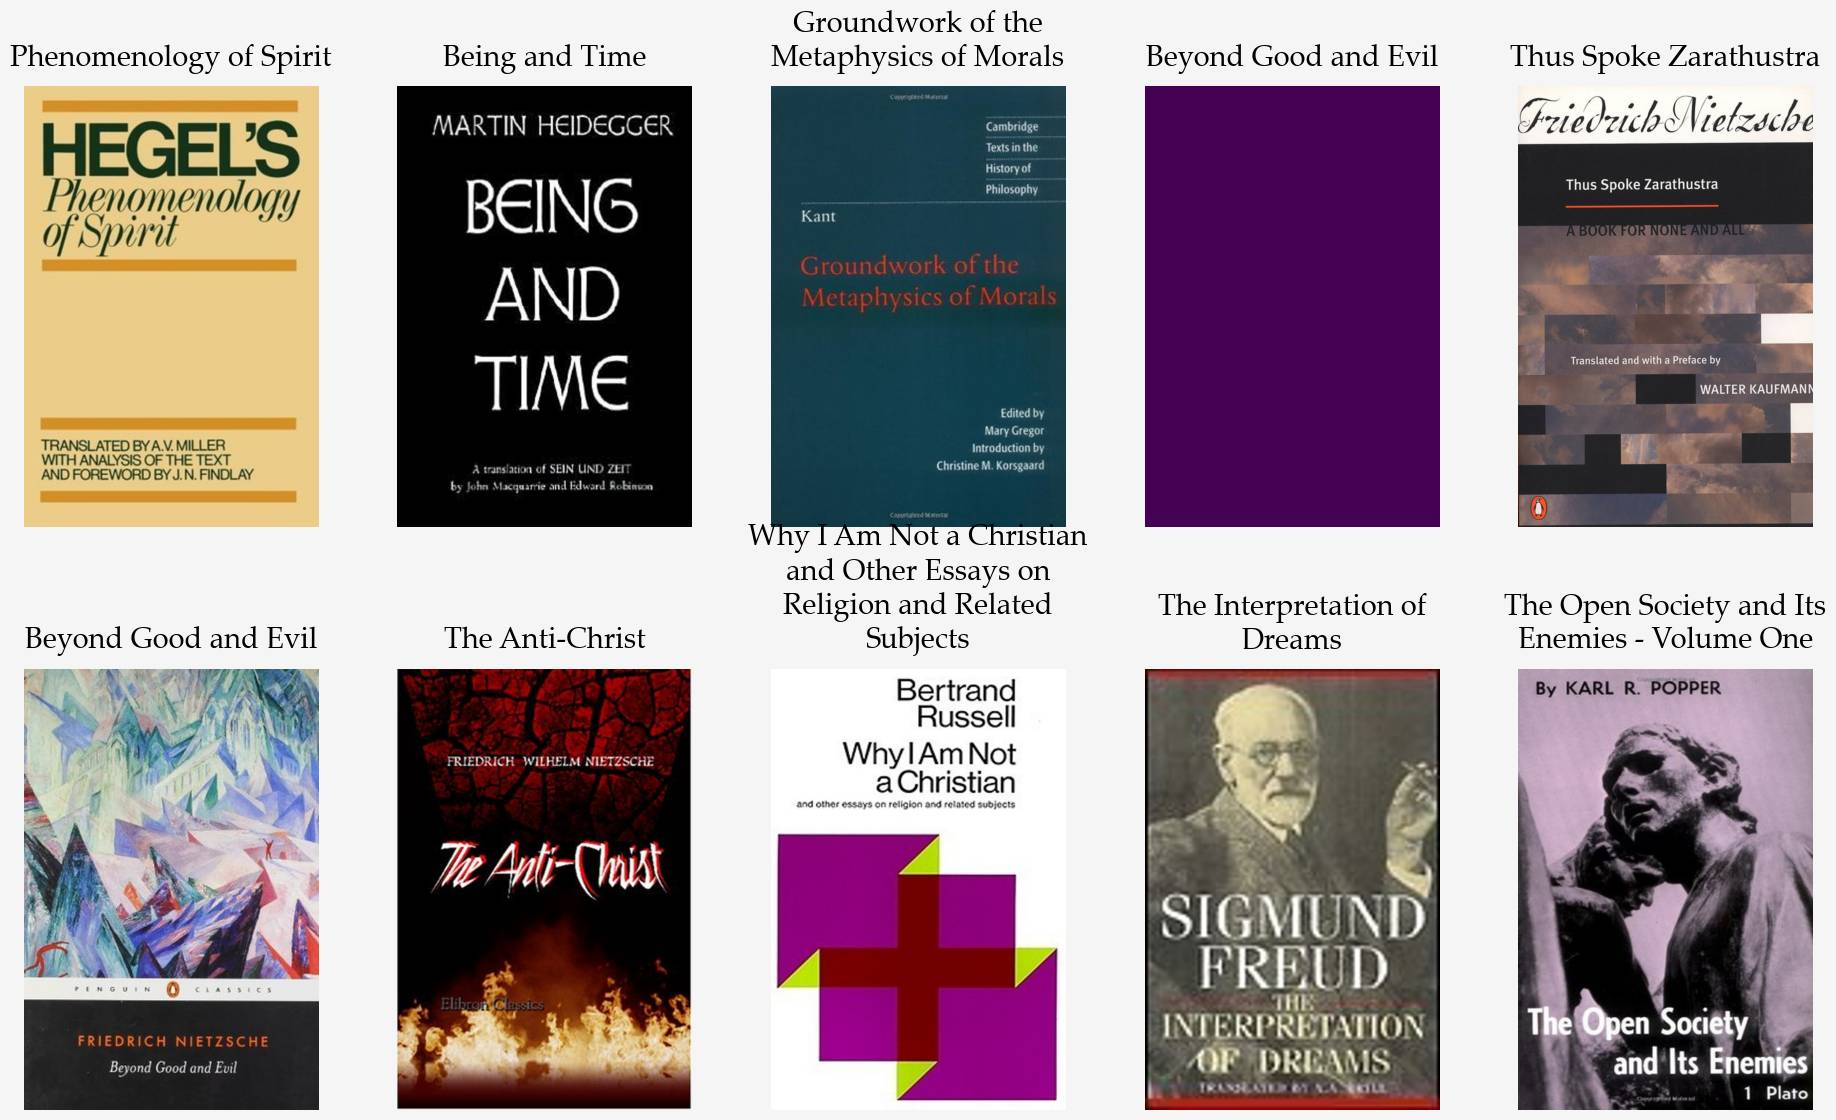


 ______________________________________________________________________________________________________________________________________________________


Thank you for trying the recommender.
Exiting...


In [68]:
#Execute the user recommender function
Get_Recommendations_fromUser()  # The Great Gatsby; Return of the king; Atomic Habit; a brief history of time; Critique of pure reason


**Generating Book Recommendations from User Query**

In [ ]:
#Define function to preprocess query from user 
def preprocess_query(query):
    #removing punctuations and whitespaces, and lowercasing
    query = ' '.join(re.findall(r'\b\w+\b', query.lower().strip()))
    #removing stop words 
    query = remove_stopwords(query, stopwords_multilang)
    #lemmatize query 
    query = lemmatize_text(query)
    #tokenize query 
    query = tokenizer.texts_to_sequences([query]) 
    #sequence padding 
    query = pad_sequences(query, maxlen=max_seq_len, padding='post', truncating='post')
    #return preprocessed query
    return query 

#Define recommendation function to recommend books from user query
def Get_Recommendations_forQuery(query=None, top_n=10):
    if query is None:
        query = str(input('\Enter book description: '))

    #Preprocess user's query
    query_processed = preprocess_query(query)
    
    #Encode the user query    
    query_embedding = embeddings_model.predict(query_processed)
    
    #Compute similarity with all book embeddings
    overall_sim_mtrx = cosine_similarity(query_embedding, book_embeddings).flatten()
    query_genre = [idx2word[word_token] if (word_token!=0 and idx2word[word_token].capitalize() in genres_df.columns) else None for word_token in query_processed[0]]
    query_genre = [q.capitalize() for q in query_genre if q is not None]
    if len(query_genre) > 0:
        book_indices = [i for i in df.index if set(query_genre).intersection(set(df['genres'].iloc[i].split(', ')))]
    else:
        #get scores by indices
        book_indices = [i for i in range(len(overall_sim_mtrx))]
    
    #Filter books to include books written in the same language as the target book
    book_indices_final = [i for i in book_indices if df['language'].iloc[i] == detect(query)]
    if not book_indices_final:
      book_indices_final = book_indices  

    #Create similarity scores for the filtered indices
    similarity_scores = [(i, overall_sim_mtrx[i]) for i in book_indices_final]

    #sort indices by cosine score and get top 10
    top_similarity_indices = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[:top_n]
    top_similarity_indices = [idx for idx,score in top_similarity_indices]  #get indices only


    #Prepare DataFrame with recommended books and their details
    recommended_books = df.iloc[top_similarity_indices][['book_title', 'author', 'genres', 'cover_image_uri']] 
    recommended_books['Recommendation'] = recommended_books.apply(lambda row: f"{row['book_title']} (by {row['author']})  -  Genre: {row['genres'].split(', ')[0]}", axis=1)
    recommended_books.reset_index(drop=True, inplace=True)

    #Return book recommendations
    print(f"\nTop {int(top_n)} book recommendations:", flush=True)
    display(recommended_books['Recommendation'].to_frame().rename(lambda x:x+1))
    print('\n', flush=True)
    get_covers(recommended_books)
    return 



**Testing the function**


Recommendations for Mystery-Thriller query:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Top 10 book recommendations:


Recommendation
1                     Nineteen Eighty (by David Peace)  -  Genre: Fiction
2                  L.A. Confidential (by James Ellroy)  -  Genre: Fiction
3                  The Big Sleep (by Raymond Chandler)  -  Genre: Mystery
4   The Mystery of the Blue Train (by Agatha Christie)  -  Genre: Mystery
5                         Find Me (by Carol O'Connell)  -  Genre: Mystery
6   The Innocence of Father Brown (by G.K. Chesterton)  -  Genre: Mystery
7           The Skull Beneath the Skin (by P.D. James)  -  Genre: Mystery
8                      The Hollow (by Agatha Christie)  -  Genre: Mystery
9              The Little Sister (by Raymond Chandler)  -  Genre: Mystery
10                  The Thin Man (by Dashiell Hammett)  -  Genre: Mystery

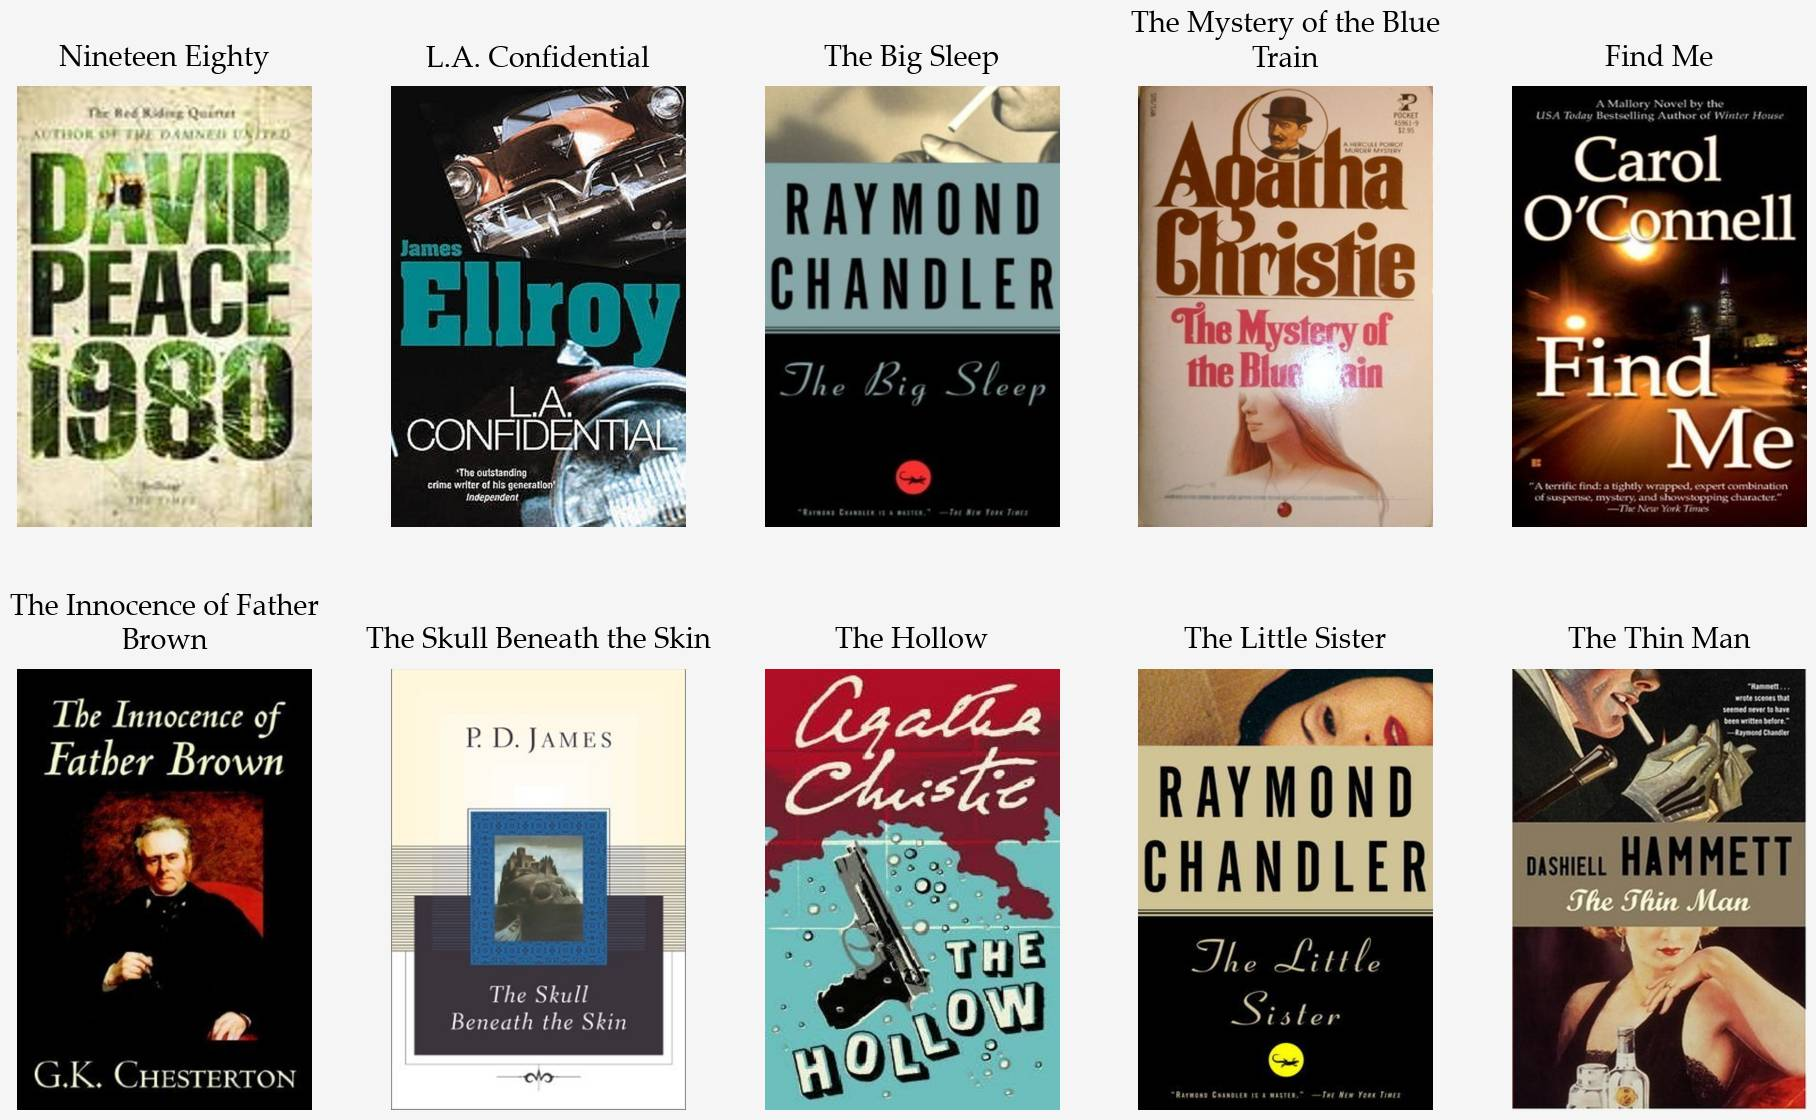


Recommendations for Fantasy-Adventure query:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Top 10 book recommendations:


Recommendation
1           Dragoncharm (by Graham Edwards)  -  Genre: Fantasy
2            Dragon Wing (by Margaret Weis)  -  Genre: Fantasy
3        A Quest of Heroes (by Morgan Rice)  -  Genre: Fantasy
4          Assassin's Quest (by Robin Hobb)  -  Genre: Fantasy
5         Silverthorn (by Raymond E. Feist)  -  Genre: Fantasy
6          Fall of Kings (by David Gemmell)  -  Genre: Fantasy
7        Mystic and Rider (by Sharon Shinn)  -  Genre: Fantasy
8    King of Sword and Sky (by C.L. Wilson)  -  Genre: Fantasy
9   Temple of the Winds (by Terry Goodkind)  -  Genre: Fantasy
10    Castle of Wizardry (by David Eddings)  -  Genre: Fantasy

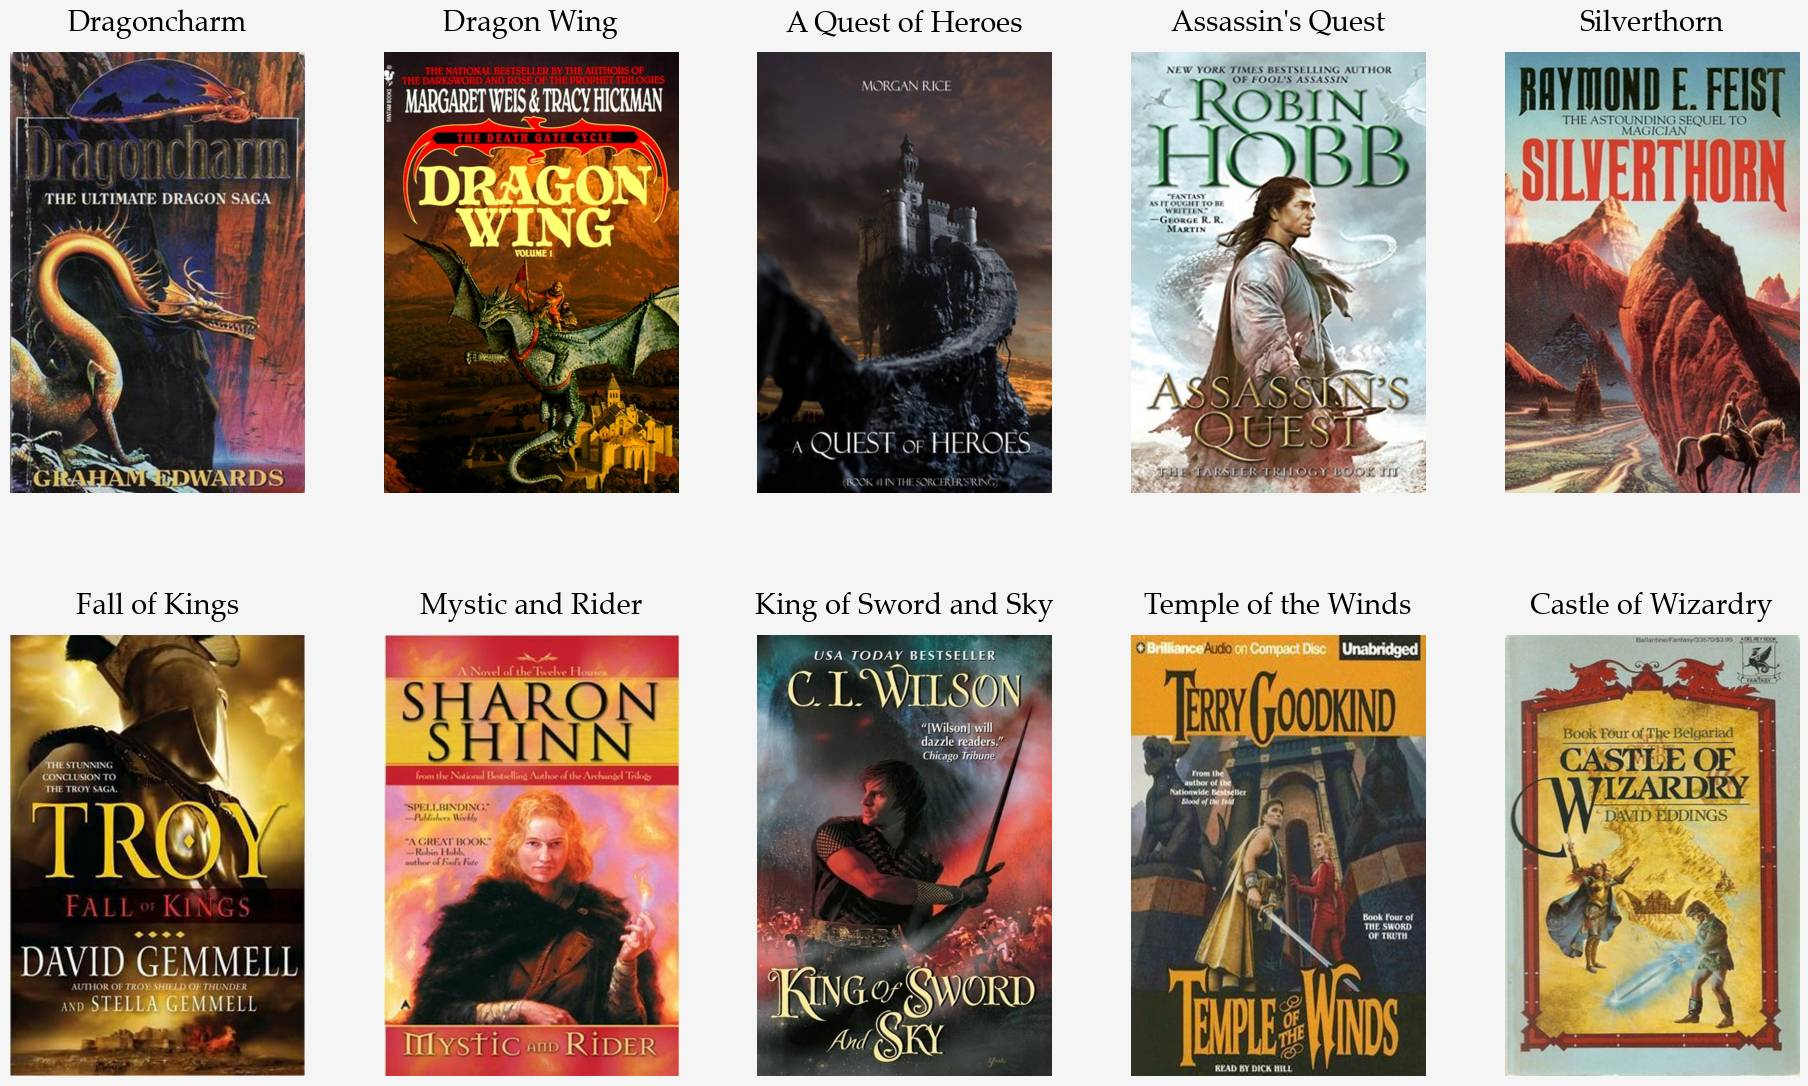


Recommendations for Philosophy query:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Top 10 book recommendations:


Recommendation
1   Individuals: An Essay in Descriptive Metaphysics (by Peter Frederick Strawson)  -  Genre: Philosophy
2                                       Critique of Pure Reason (by Immanuel Kant)  -  Genre: Philosophy
3                                                     Orthodoxy (by G.K. Chesterton)  -  Genre: Theology
4     The Divided Self: An Existential Study in Sanity and Madness (by R.D. Laing)  -  Genre: Psychology
5                                             After Virtue (by Alasdair MacIntyre)  -  Genre: Philosophy
6                                         The Anti-Christ (by Friedrich Nietzsche)  -  Genre: Philosophy
7                                Minds, Brains and Science (by John Rogers Searle)  -  Genre: Philosophy
8                                    Representation and Reality (by Hilary Putnam)  -  Genre: Philosophy
9                                   The Coherence of Theism (by Richard Swinburne)  -  Genre: Philosophy
10                                 Thus Spoke Zarathustra (by Friedrich Nietzsche)  -  Genre: Philosophy

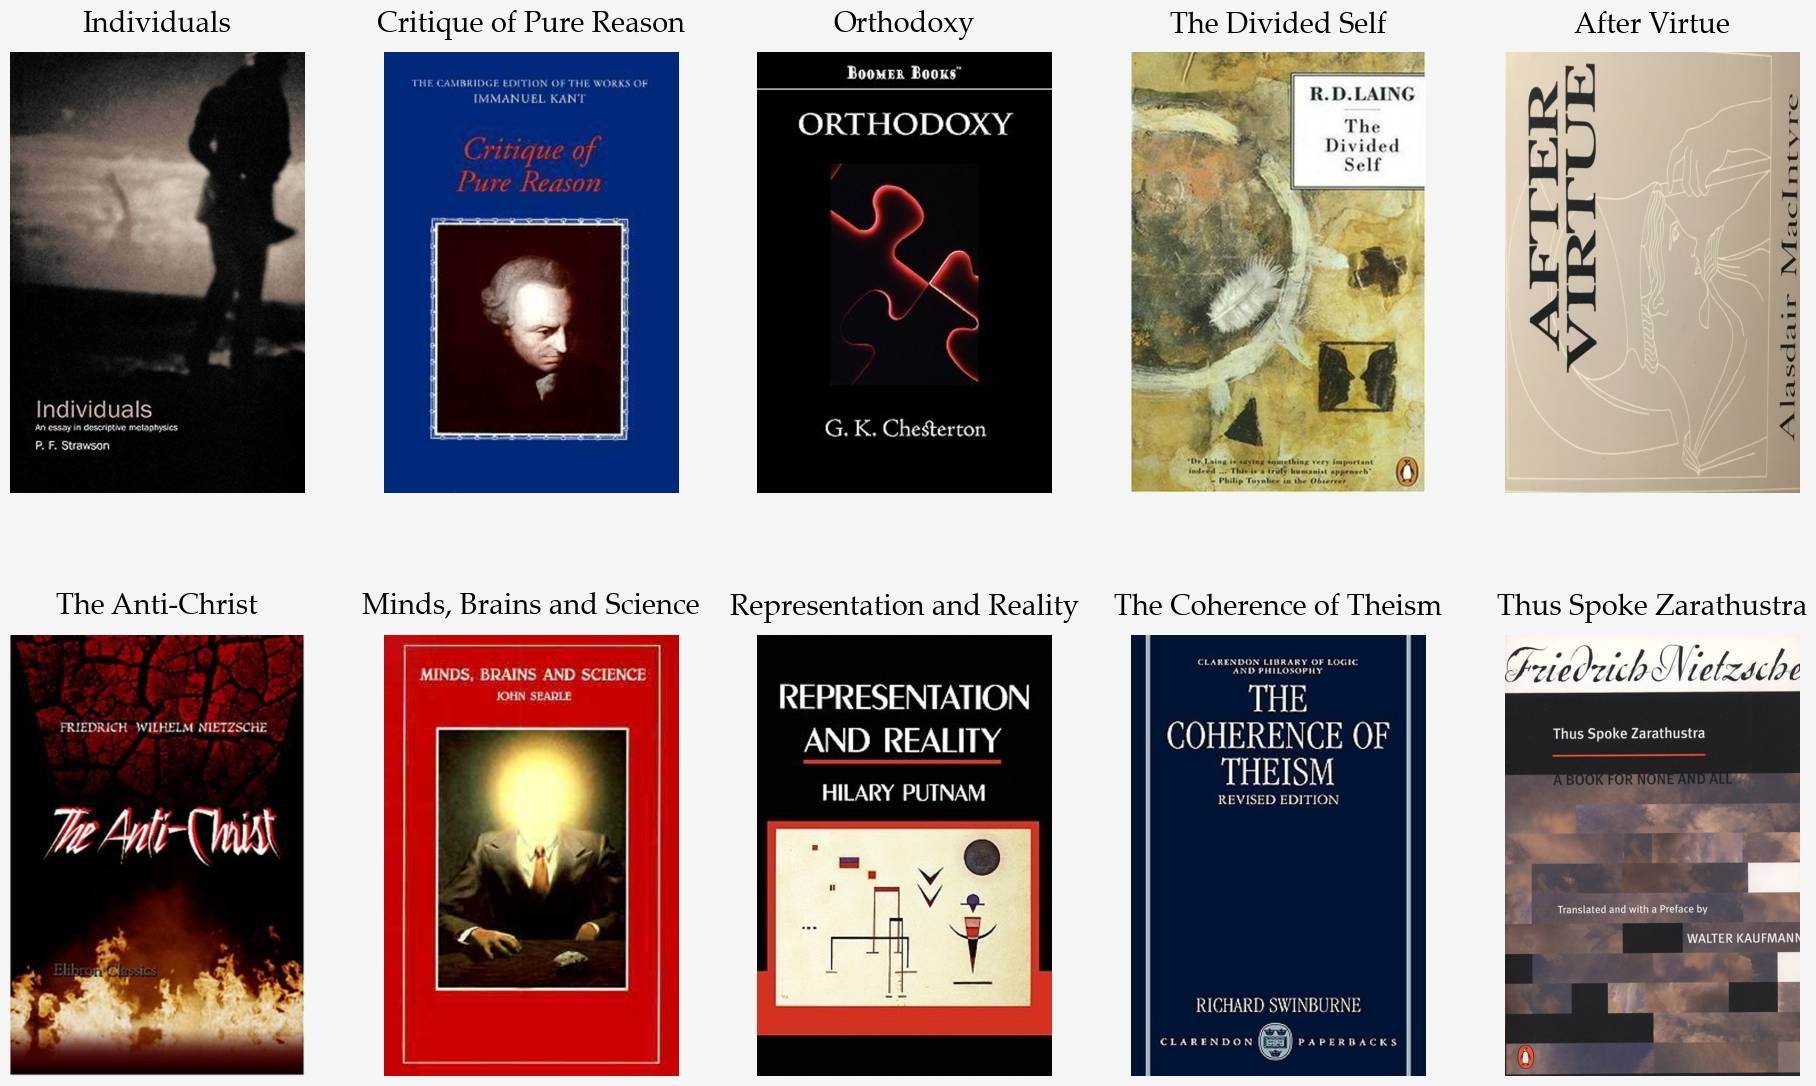

In [ ]:
#Queries to test out 
mystery_thriller_query = "Recommend a detective noir set in a corrupt little town, with a gritty detective and a femme fatale."
fantasy_adventure_query = "Recommend a high-fantasy epic about a quest to save the world from an ancient evil, filled with magic and mythical creatures."
philosophy_query = "Recommend a philosophy book about the nature of consciousness, reason and the objective-subjective distinction."

queries = [mystery_thriller_query, fantasy_adventure_query, philosophy_query] 
query_type = ['Mystery-Thriller', 'Fantasy-Adventure', 'Philosophy']

for query,query_type in zip(queries, query_type):
    print(f'\nRecommendations for {query_type} query:')
    Get_Recommendations_forQuery(query)

<a id="summary"></a>
## Part Eight: Summary
<br>
In summary, this project aimed to make use of deep neural networks to develop a comprehensive book recommendation system. Book data were prepared and preprocessed. A deep neural network was then developed incorporating embedding, bidirectional LSTM, self-attention, and fully-connected dense layers, and trained with triplet loss to perform book descriptions embedding and process these embeddings to carve out a representation space that represents the books dataset in a meaningful way. As demonstrated, the network successfully learned the embeddings as evidenced by triplet loss across training epochs. A book recommendation function was then developed, incorporating the resulting embeddings from the neural network and also leveraging genre similarity to generate book recommendation from book title inputs and user inputs. As observed from the resulting recommendations, the book recommendations appear pretty reasonable and mostly on point. Another recommender was also developed to generate recommendations from user query instead of simply relying on input titles from the dataset, and once again the network proved successful, helping the recommender generate reasonably tailored suggestions for the most part. Thus, the objectives of the project were met. Deep learning was effectively employed to successfully develop a robust book recommendation system capable of delivering personalized book recommendations from a vast library of books.